<a href="https://colab.research.google.com/github/skai-ee/Biopal-Report-2/blob/main/Biopal_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name 1: Kyla  

ID: S10269885D

Student Name 2: Qiara

ID: S10269079J

Student Name 3: Skye   

ID: S10267892

Link to GitHub repo: https://github.com/skai-ee/Biopal-Project-1-.git

Link to Google Colab: https://colab.research.google.com/drive/1bGGpxt6lygwe4Hfc5v7vKu8q_erRpUez?usp=sharing


Background and rationale:

Cardiovascular disease (CVD) is a broad term that refers to a group of disorders affecting the heart and blood vessels. It is the leading cause of death globally, responsible for an estimated 17.9 million deaths each year. Types of CVD include Coronary Artery Disease (CAD), Cerebrovascular disease, Peripheral Artery Disease (PAD), heart failure and congenital heart defects.
This reasearch question can be used to identify the groups of people most prone to getting the disease so we can implement early preventions to help delay or prevent the onset of the disease.

Research questions:

"Does Age (20-40 years), Gender (Male, Female), Smoking History (Non-smokers, Smokers), Stress Levels (High, Normal), BMI (Acceptable, High) and Race(African Americans, Hispanics), have an effect on Total Triglyceride Levels (LBXTR), HDL (LBDHDL) and  LDL (LBDLDL) using NHANES 2003-2004 to 2017- 2018 data”

Biomarkers for CVD include high LDL levels, low HDL levels and elevated total triglyceride levels. Major risk factors affecting Total Triglyceride Levels (LBXTR), HDL (LBDHDL) and LDL (LBDLDL), include smoking, obesity, stress levels, race and age. By assessing these major risk factors, including other factors such as BMI and race, we are able to determine the populations of people who are most prone to developing CVD.

Despite medical advancements, there are critical areas of limited understanding.


There are differences in studies between Males and Females. “Biology, Bias, or Both? The Contribution of Sex and Gender to the Disparity in Cardiovascular Outcomes Between Women and Men” (2022, Current Atherosclerosis Reports) highlights that women are understudied, underdiagnosed, and undertreated in CVD research and experience longer delays in diagnosis and treatment as compared to men.


There are also Racial Disparities. “Differences in Cardiovascular Health at the Intersection of Race, Ethnicity, and Sexual Identity” (2024, JAMA Network Open) shows that Black and Hispanic women have worse cardiovascular health compared to other subgroups. Thus we have chosen to focus on African Americans and Hispanics.


Lastly, there are also Age Related Gaps. “Awareness of Cardiovascular Risk Factors in U.S. Young Adults Aged 18–39 Years” (2018, American Journal of Preventive Medicine) shows that among U.S. adults aged 18–39, less than 25% of those with borderline risk levels were aware they were at risk. Hence, we want to investigate people of younger age ranges of 20-40 years.

Objectives:

Specific: Does Age (20-40 years), Gender (Male, Female), Smoking History (Non-smokers, Smokers), Stress Levels (High, Normal), BMI (Acceptable, High) and Race (African Americans, Hispanics), have an effect Total Triglyceride Levels, HDL and LDL
Measurable: NHANES 2003-2004 to 2017-2018 data set to be used, providing large sample size and continuous variables

Achievable: Able to work with data provided by NHANES and within time limit

Relevant: Age (20-40 years), Gender (Male, Female), Smoking History (Non-smokers, Smokers), Stress Levels (High, Normal), BMI (Acceptable, High) and Race (African Americans, Hispanics), are factors affecting CVD

Time-bound: To complete work within 1 month


 Variables and Data Sources:

 Dependant Variables:
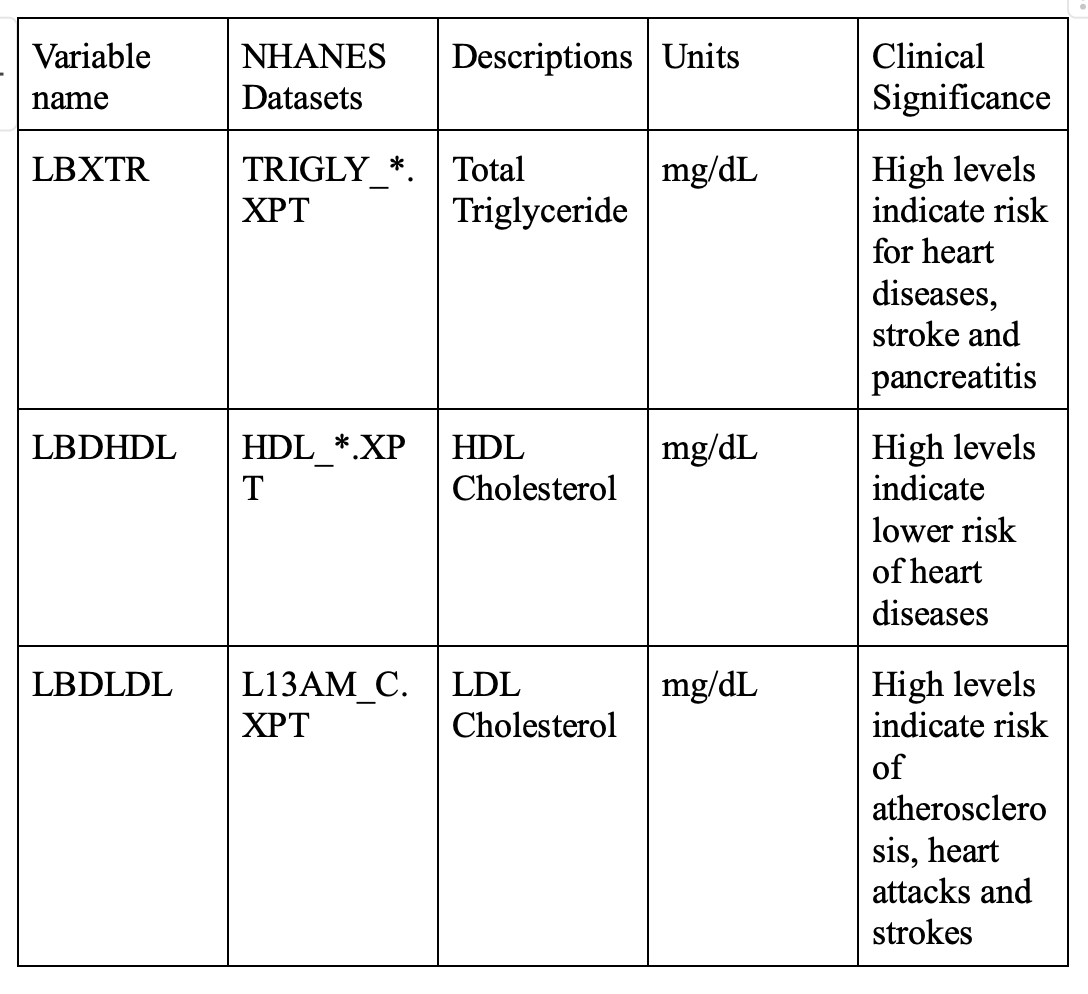


Independant Variables:

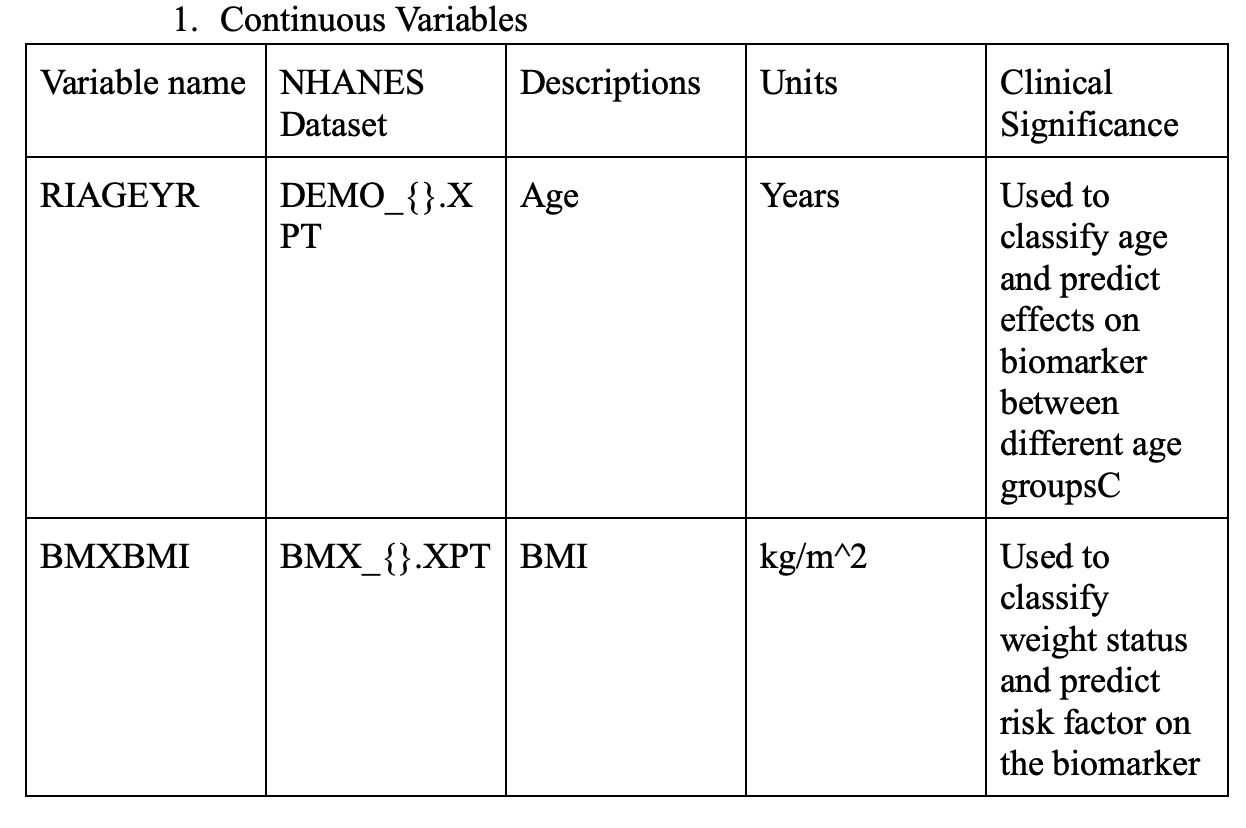

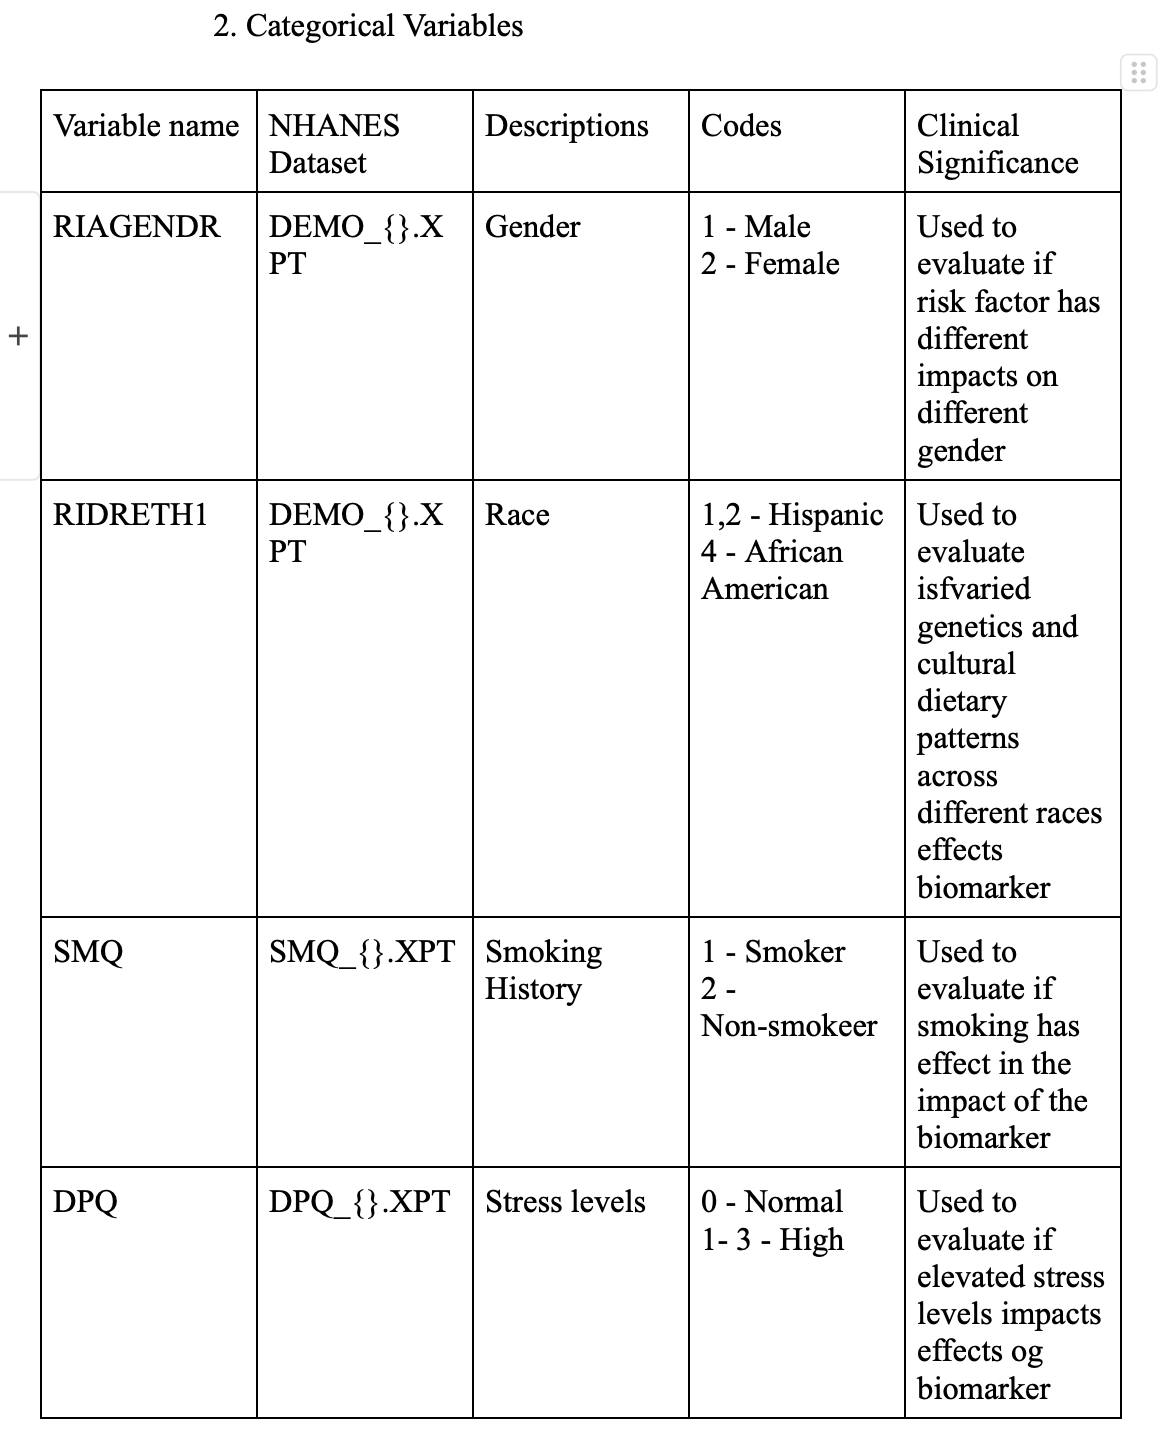

Total number of participants  = about 5000

Inclusion criteria

  - Participants older than 40

  - Hispanics and African American

  - Acceptable & High BMI

  - High & Normal Stress Levels


Data set exploration:

In [ ]:
import pandas as pd
import numpy as np

# Define only 2003–2018 cycles
cycles = ['C','D','E','F','G','H','I','J']
years = ['2003','2005','2007','2009','2011','2013','2015','2017']

# LDL is typically found in TRIGLY or Cholesterol profile
base_url = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year}/DataFiles/"

def get_url(file_prefix, year, cycle):
    return f"{base_url.format(year=year)}{file_prefix}_{cycle}.xpt"

# Initialize lists
demo_list, ldl_list, bmx_list, dpq_list, smq_list = [], [], [], [], []

# Load data for each cycle
for year, cycle in zip(years, cycles):
    print(f"\n=== Loading cycle {cycle} ({year}) ===")

    demo_list.append(pd.read_sas(get_url('DEMO', year, cycle)))
    bmx_list.append(pd.read_sas(get_url('BMX', year, cycle)))
    smq_list.append(pd.read_sas(get_url('SMQ', year, cycle)))

    try:
        dpq_list.append(pd.read_sas(get_url('DPQ', year, cycle)))
    except:
        print(f"DPQ not available for cycle {cycle}")

    try:
        ldl_list.append(pd.read_sas(get_url('TRIGLY', year, cycle)))  # LDL mostly from TRIGLY
    except:
        print(f"TRIGLY (LDL) not available for cycle {cycle}")

# Combine datasets
demo = pd.concat(demo_list, ignore_index=True)
bmx = pd.concat(bmx_list, ignore_index=True)
smq = pd.concat(smq_list, ignore_index=True)
dpq = pd.concat(dpq_list, ignore_index=True) if dpq_list else None
ldl = pd.concat(ldl_list, ignore_index=True)

# Merge on SEQN
df = demo.merge(ldl, on='SEQN', how='inner') \
         .merge(bmx, on='SEQN', how='inner') \
         .merge(smq, on='SEQN', how='inner')

if dpq is not None:
    df = df.merge(dpq, on='SEQN', how='inner')

# Select LDL variable
ldl_col = [col for col in df.columns if 'LDL' in col.upper()]
print("Detected LDL columns:", ldl_col)
df['LDL'] = df[ldl_col[0]]  # Use first detected LDL column

# Age filter
df = df[df['RIDAGEYR'].between(20, 40)]
df['AgeGroup'] = '20-40'

# Gender
df['Gender'] = df['RIAGENDR'].replace({1: 'Male', 2: 'Female'})

# Race (expanded)
df['Race'] = df['RIDRETH1'].replace({
    1: 'Hispanic',
    2: 'Hispanic',
    3: 'White',
    4: 'African American',
    5: 'Other'
})

# Smoking History
df['Smoker'] = df['SMQ020'].replace({1: 'Smoker', 2: 'Non-smoker'})

# BMI and category
df['BMI'] = df['BMXBMI']
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 25, 100], labels=['Acceptable', 'High'])

# Stress level from DPQ020
if 'DPQ020' in df.columns:
    df['Stress'] = df['DPQ020'].replace({0: 'Normal', 1: 'High', 2: 'High', 3: 'High'})
else:
    df['Stress'] = np.nan  # if DPQ not available

# Keep only relevant columns
columns_to_keep = ['SEQN', 'LDL', 'AgeGroup', 'Gender', 'Race', 'Smoker', 'BMI', 'BMI_Category', 'Stress']
df_clean = df[columns_to_keep]

# Report missing values
print("\nMissing values before cleaning:")
print(df_clean.isnull().sum())

# Drop rows with any missing values
df_clean = df_clean.dropna()

print("\nFinal sample size after dropping missing values:", df_clean.shape)

# Save cleaned dataset
df_clean.to_csv("NHANES_LDL_Predictors_2003_2018.csv", index=False)
print("\nSaved cleaned dataset to NHANES_LDL_Predictors_2003_2018.csv")



=== Loading cycle C (2003) ===
DPQ not available for cycle C
TRIGLY (LDL) not available for cycle C

=== Loading cycle D (2005) ===

=== Loading cycle E (2007) ===

=== Loading cycle F (2009) ===

=== Loading cycle G (2011) ===

=== Loading cycle H (2013) ===

=== Loading cycle I (2015) ===

=== Loading cycle J (2017) ===
Detected LDL columns: ['LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDLN']

Missing values before cleaning:
SEQN              0
LDL             568
AgeGroup          0
Gender            0
Race              0
Smoker            1
BMI              52
BMI_Category     52
Stress          704
dtype: int64

Final sample size after dropping missing values: (5269, 9)

Saved cleaned dataset to NHANES_LDL_Predictors_2003_2018.csv


In [ ]:
# Show the entire cleaned DataFrame (first 100 rows as example)
print(df_clean.head(100))


        SEQN    LDL AgeGroup  Gender      Race      Smoker    BMI  \
8    31155.0   91.0    20-40    Male     Other  Non-smoker  25.61   
11   31167.0  100.0    20-40    Male     White      Smoker  34.44   
13   31183.0   86.0    20-40  Female     White  Non-smoker  25.70   
15   31187.0  112.0    20-40  Female     White  Non-smoker  25.26   
16   31191.0  126.0    20-40  Female  Hispanic  Non-smoker  18.64   
..       ...    ...      ...     ...       ...         ...    ...   
302  32381.0  131.0    20-40  Female     Other      Smoker  29.95   
303  32382.0   84.0    20-40  Female     White  Non-smoker  23.33   
305  32386.0  100.0    20-40    Male     White      Smoker  24.78   
308  32401.0   73.0    20-40  Female  Hispanic  Non-smoker  25.38   
311  32441.0  183.0    20-40  Female     White      Smoker  36.85   

    BMI_Category Stress  
8           High    0.0  
11          High   High  
13          High   High  
15          High    0.0  
16    Acceptable   High  
..           ..

Original Columns: ['SEQN', 'LDL', 'AgeGroup', 'Gender', 'Race', 'Smoker', 'BMI', 'BMI_Category', 'Stress']
Filtered Race to Hispanic and African American, created Race_bin
Cleaned and binary encoded 'Smoker'
Cleaned and binary encoded 'Gender'
Cleaned and binary encoded 'BMI_Category'
Cleaned and binary encoded 'Stress'

Columns after encoding: ['SEQN', 'LDL', 'AgeGroup', 'BMI', 'Race_bin', 'Smoker_bin', 'Gender_bin', 'BMI_Category_bin', 'Stress_bin']

Descriptive statistics:

-- LDL --
Count: 658
Mean: 107.14
Median: 105.00
Std Dev: 33.53
Q1: 82.25
Q3: 126.75
Skewness: 0.56

-- BMI --
Count: 658
Mean: 29.87
Median: 28.66
Std Dev: 7.82
Q1: 24.59
Q3: 33.58
Skewness: 1.27

-- Race_bin --
Count: 658
Mean: 0.57
Median: 1.00
Std Dev: 0.50
Q1: 0.00
Q3: 1.00
Skewness: -0.29

-- Smoker_bin --
Count: 658
Mean: 0.38
Median: 0.00
Std Dev: 0.49
Q1: 0.00
Q3: 1.00
Skewness: 0.50

-- Gender_bin --
Count: 658
Mean: 0.39
Median: 0.00
Std Dev: 0.49
Q1: 0.00
Q3: 1.00
Skewness: 0.47

-- BMI_Category_bin -

/tmp/ipython-input-2058347816.py:100: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(f"Skewness: {skew(data):.2f}\n")


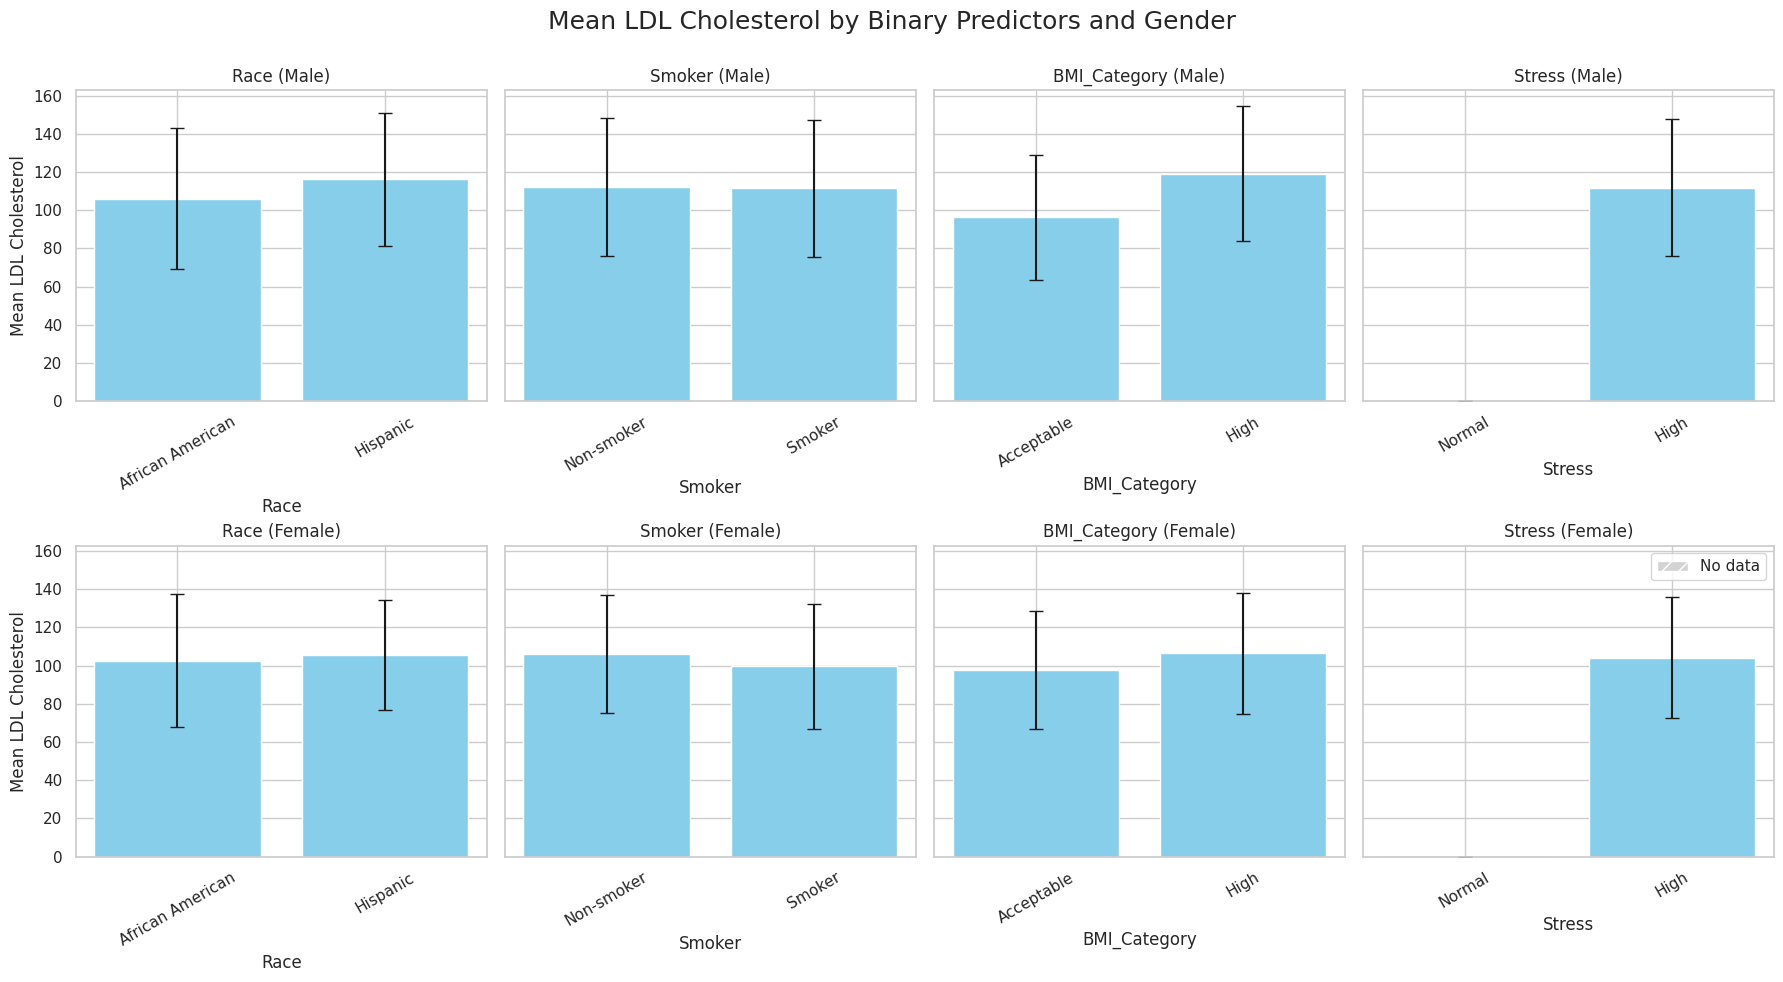


✅ Saved encoded and cleaned dataset to NHANES_LDL_Predictors_Encoded_Cleaned.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder

# Load cleaned dataset
df_clean = pd.read_csv("NHANES_LDL_Predictors_2003_2018.csv")

print("Original Columns:", df_clean.columns.tolist())

# --- STEP 1: Filter Race and create binary race variable ---

if 'Race' in df_clean.columns:
    df_clean = df_clean[df_clean['Race'].isin(['Hispanic', 'African American'])]
    df_clean['Race_bin'] = df_clean['Race'].map({'African American': 0, 'Hispanic': 1})
    print("Filtered Race to Hispanic and African American, created Race_bin")
else:
    print("[!] 'Race' column not found")

# --- STEP 2: Clean and encode other categorical variables ---

# Clean 'Smoker' - map categories to binary, excluding unknown or unclear
if 'Smoker' in df_clean.columns:
    smoker_map = {
        'Smoker': 1,
        'Non-smoker': 0
    }
    df_clean = df_clean[df_clean['Smoker'].isin(smoker_map.keys())]  # keep only known categories
    df_clean['Smoker_bin'] = df_clean['Smoker'].map(smoker_map)
    print("Cleaned and binary encoded 'Smoker'")
else:
    print("[!] 'Smoker' column not found")

# Encode Gender (expecting exactly 2 categories)
if 'Gender' in df_clean.columns:
    gender_map = {
        'Male': 1,
        'Female': 0
    }
    df_clean = df_clean[df_clean['Gender'].isin(gender_map.keys())]
    df_clean['Gender_bin'] = df_clean['Gender'].map(gender_map)
    print("Cleaned and binary encoded 'Gender'")
else:
    print("[!] 'Gender' column not found")

# Encode BMI_Category (expecting 2 categories)
if 'BMI_Category' in df_clean.columns:
    bmi_map = {
        'Acceptable': 0,
        'High': 1
    }
    df_clean = df_clean[df_clean['BMI_Category'].isin(bmi_map.keys())]
    df_clean['BMI_Category_bin'] = df_clean['BMI_Category'].map(bmi_map)
    print("Cleaned and binary encoded 'BMI_Category'")
else:
    print("[!] 'BMI_Category' column not found")

# Encode Stress if present (expecting 2 categories: Normal, High)
if 'Stress' in df_clean.columns:
    stress_map = {
        'Normal': 0,
        'High': 1
    }
    df_clean = df_clean[df_clean['Stress'].isin(stress_map.keys())]
    df_clean['Stress_bin'] = df_clean['Stress'].map(stress_map)
    print("Cleaned and binary encoded 'Stress'")
else:
    print("[!] 'Stress' column not found or excluded")

# --- STEP 3: Drop original categorical columns ---

to_drop = ['Race', 'Smoker', 'Gender', 'BMI_Category', 'Stress']
df_clean.drop(columns=[col for col in to_drop if col in df_clean.columns], inplace=True)

print("\nColumns after encoding:", df_clean.columns.tolist())

# --- STEP 4: Convert boolean columns to int (if any) ---
bool_cols = df_clean.select_dtypes(include='bool').columns
if not bool_cols.empty:
    print(f"Converting boolean columns to int: {bool_cols.tolist()}")
    df_clean[bool_cols] = df_clean[bool_cols].astype(int)

# --- STEP 5: Descriptive stats (optional) ---
continuous_vars = ['LDL', 'BMI']
binary_vars = [col for col in df_clean.columns if col.endswith('_bin')]

print("\nDescriptive statistics:\n")
for var in continuous_vars + binary_vars:
    data = df_clean[var].dropna()
    print(f"-- {var} --")
    print(f"Count: {len(data)}")
    print(f"Mean: {data.mean():.2f}")
    print(f"Median: {data.median():.2f}")
    print(f"Std Dev: {data.std():.2f}")
    if len(data) >= 2:
        print(f"Q1: {data.quantile(0.25):.2f}")
        print(f"Q3: {data.quantile(0.75):.2f}")
    print(f"Skewness: {skew(data):.2f}\n")

# --- STEP 6: Plotting ---

sns.set(style="whitegrid")

# Map Gender_bin back to string labels for plot rows
gender_map_rev = {0: 'Female', 1: 'Male'}

df_clean['Gender_label'] = df_clean['Gender_bin'].map(gender_map_rev)

variables = {
    'Race_bin': {0: 'African American', 1: 'Hispanic'},
    'Smoker_bin': {0: 'Non-smoker', 1: 'Smoker'},
    'BMI_Category_bin': {0: 'Acceptable', 1: 'High'},
    'Stress_bin': {0: 'Normal', 1: 'High'}
}

# Remove variables not in data (e.g., Stress_bin may not exist)
variables = {k: v for k, v in variables.items() if k in df_clean.columns}

genders = ['Male', 'Female']

fig, axes = plt.subplots(2, max(len(variables),3), figsize=(18, 10), sharey=True)

for row_idx, gender in enumerate(genders):
    sub_df = df_clean[df_clean['Gender_label'] == gender]

    for col_idx, (var, cat_map) in enumerate(variables.items()):
        ax = axes[row_idx, col_idx]

        means = sub_df.groupby(var)['LDL'].mean().reindex(cat_map.keys())
        stds = sub_df.groupby(var)['LDL'].std().reindex(cat_map.keys())

        means_filled = means.fillna(0)
        stds_filled = stds.fillna(0)

        labels = [cat_map[val] for val in means_filled.index]

        bars = ax.bar(labels, means_filled.values, yerr=stds_filled.values, capsize=5, color='skyblue')

        for bar, mean in zip(bars, means_filled):
            if mean == 0:
                bar.set_hatch('//')
                bar.set_color('lightgray')

        ax.set_title(f"{var.replace('_bin', '')} ({gender})")
        ax.set_xlabel(var.replace('_bin', ''))
        if col_idx == 0:
            ax.set_ylabel("Mean LDL Cholesterol")
        y_max = max(means_filled.values + stds_filled.values)
        ax.set_ylim(0, y_max * 1.2 if y_max > 0 else 1)
        ax.tick_params(axis='x', rotation=30)

# Hide any unused subplots if variables less than 3
for i in range(len(variables), 3):
    axes[0, i].set_visible(False)
    axes[1, i].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Mean LDL Cholesterol by Binary Predictors and Gender", fontsize=18)

import matplotlib.patches as mpatches
hatch_patch = mpatches.Patch(facecolor='lightgray', hatch='//', label='No data')
plt.legend(handles=[hatch_patch], loc='upper right')

plt.show()

# --- STEP 7: Save cleaned and encoded dataset ---

df_clean.to_csv("NHANES_LDL_Predictors_Encoded_Cleaned.csv", index=False)
print("\n✅ Saved encoded and cleaned dataset to NHANES_LDL_Predictors_Encoded_Cleaned.csv")


In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Load your cleaned encoded dataset
df = pd.read_csv("NHANES_LDL_Predictors_Encoded_Cleaned.csv")

# Define continuous variables to test
continuous_vars = ['LDL', 'BMI']  # adjust if you have others

print("=== Shapiro-Wilk Normality Test ===")

for var in continuous_vars:
    if var in df.columns:
        data = pd.to_numeric(df[var], errors='coerce').dropna()
        if len(data) < 3:
            print(f"\nVariable '{var}' has less than 3 valid observations — skipping normality test.")
            continue

        stat, p = shapiro(data)
        print(f"\nVariable: {var}")
        print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")
        if p > 0.05:
            print(f"--> Data for '{var}' looks normally distributed (fail to reject H0)")
        else:
            print(f"--> Data for '{var}' does NOT look normally distributed (reject H0)")
    else:
        print(f"\nWarning: Variable '{var}' not found in dataset.")



=== Shapiro-Wilk Normality Test ===

Variable: LDL
Shapiro-Wilk test statistic = 0.9815, p-value = 0.0000
--> Data for 'LDL' does NOT look normally distributed (reject H0)

Variable: BMI
Shapiro-Wilk test statistic = 0.9234, p-value = 0.0000
--> Data for 'BMI' does NOT look normally distributed (reject H0)


In [ ]:
import pandas as pd

# Load the cleaned encoded dataset
df = pd.read_csv("NHANES_LDL_Predictors_Encoded_Cleaned.csv")

# Continuous biomarkers
continuous_vars = ['LDL', 'BMI']

print("=== Median values for continuous biomarkers ===")
for var in continuous_vars:
    if var in df.columns:
        median_val = pd.to_numeric(df[var], errors='coerce').median()
        print(f"{var}: Median = {median_val:.2f}")
    else:
        print(f"Warning: Variable '{var}' not found.")

# High-risk / abnormal biomarker ranges
print("\n=== Percentage in high-risk/abnormal ranges ===")

# LDL high risk: ≥130 mg/dL
if 'LDL' in df.columns:
    ldl_high_risk = pd.to_numeric(df['LDL'], errors='coerce')
    percent_ldl_high = (ldl_high_risk >= 130).mean() * 100
    print(f"Percentage with high LDL (≥130 mg/dL): {percent_ldl_high:.2f}%")
else:
    print("Warning: LDL variable not found.")

# BMI high risk: BMI ≥ 25 (overweight/obese)
if 'BMI' in df.columns:
    bmi_vals = pd.to_numeric(df['BMI'], errors='coerce')
    percent_bmi_high = (bmi_vals >= 25).mean() * 100
    print(f"Percentage with high BMI (≥25): {percent_bmi_high:.2f}%")
else:
    print("Warning: BMI variable not found.")


=== Median values for continuous biomarkers ===
LDL: Median = 105.00
BMI: Median = 28.66

=== Percentage in high-risk/abnormal ranges ===
Percentage with high LDL (≥130 mg/dL): 23.71%
Percentage with high BMI (≥25): 72.34%


In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Load your encoded and cleaned dataset
df = pd.read_csv("NHANES_LDL_Predictors_Encoded_Cleaned.csv")

# Ensure LDL and BMI_Category_bin are numeric
df['LDL'] = pd.to_numeric(df['LDL'], errors='coerce')
# BMI_Category_bin should already be numeric after encoding, no need to convert again

# Drop rows with missing values in LDL or BMI_Category_bin
df_filtered = df[['LDL', 'BMI_Category_bin']].dropna()

# Group by BMI categories (0: Acceptable, 1: High)
# Note: Based on the encoding in the previous cell, 0 is 'Acceptable' and 1 is 'High' for BMI_Category_bin
# There is no 'Underweight' category in the encoded data after filtering and binary encoding BMI_Category.
group_0 = df_filtered[df_filtered['BMI_Category_bin'] == 0]['LDL']  # Acceptable
group_1 = df_filtered[df_filtered['BMI_Category_bin'] == 1]['LDL']  # High


# Check there are enough values in each group (at least 2 groups with >= 3 data points for Kruskal-Wallis)
data_for_test = [g for g in [group_0, group_1] if len(g) >= 3]

if len(data_for_test) >= 2:
    stat, p = kruskal(*data_for_test)
    print("\n=== Kruskal-Wallis Test for LDL across BMI Categories ===")
    print(f"Test Statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")
    if p < 0.05:
        print("→ Significant difference in median LDL across BMI categories (reject H₀)")
    else:
        print("→ No significant difference in median LDL (fail to reject H₀)")
else:
    print("⚠️ Not enough valid groups (with >= 3 data points) to run the Kruskal-Wallis test.")


=== Kruskal-Wallis Test for LDL across BMI Categories ===
Test Statistic: 25.9597
P-value: 0.0000
→ Significant difference in median LDL across BMI categories (reject H₀)


In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load dataset
df = pd.read_csv("NHANES_LDL_Predictors_2003_2018.csv")

# Define BMI categories based on BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Acceptable'
    else:
        return 'Overweight'

# Apply categorization function
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

# Drop missing LDL or BMI_Category
df_clean = df[['LDL', 'BMI_Category']].dropna()

# Make sure LDL is numeric
df_clean['LDL'] = pd.to_numeric(df_clean['LDL'], errors='coerce')
df_clean = df_clean.dropna(subset=['LDL'])

# Run ANOVA model
model = ols('LDL ~ C(BMI_Category)', data=df_clean).fit()

# Tukey-Kramer post hoc test
tukey = pairwise_tukeyhsd(endog=df_clean['LDL'], groups=df_clean['BMI_Category'], alpha=0.05)

print(tukey.summary())


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2   meandiff p-adj   lower    upper  reject
--------------------------------------------------------------
Acceptable  Overweight  14.2256    0.0   11.982 16.4692   True
Acceptable Underweight  -9.0776 0.0073 -16.1411 -2.0141   True
Overweight Underweight -23.3032    0.0 -30.2574 -16.349   True
--------------------------------------------------------------


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load cleaned and encoded dataset
df = pd.read_csv("NHANES_LDL_Predictors_Encoded_Cleaned.csv")

# Define dependent and independent variables
# Exclude 'AgeGroup' and 'Gender_label' as they are not suitable for the model
X = df[['BMI', 'Race_bin', 'Smoker_bin', 'Gender_bin', 'Stress_bin', 'BMI_Category_bin']]
y = df['LDL']

# Drop rows with missing values in the selected variables
df_model = df[X.columns.tolist() + [y.name]].dropna()

X = df_model[X.columns]
y = df_model[y.name]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    LDL   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     9.420
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           1.11e-08
Time:                        03:47:21   Log-Likelihood:                -3221.4
No. Observations:                 658   AIC:                             6455.
Df Residuals:                     652   BIC:                             6482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
BMI                  0.4834      0.212  

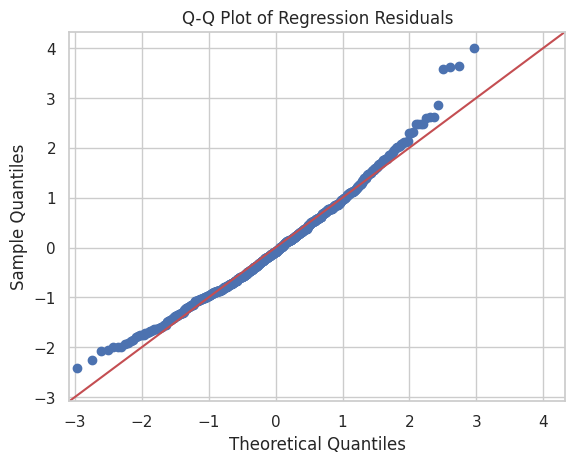

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your regression model is already fitted and called 'model'
residuals = model.resid

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Regression Residuals')
plt.grid(True)
plt.show()


Outcomes:

Since, the data is not normally distributed, we carried out a kruskal wallis isntead of ANOVA. Since BMI seems to affect mean LDL cholestrol levels in both males and females, we wanted to see if there is a significant difference in the median LDL cholestrol level across 3 BMI categories. Since the p-value is 0 and is smaller than the significance level, then the null hypothesis can be rejected and there is a significant difference in the median cholestrol level across the 3 BMI categories. The post hoc test also shows that difference in the median LDL cholestrol beween acceptable and overweight, acceptable and underweight and underweight and overweight are statistically significant. Thus, BMI does affect LDL cholestrol levels.

From the multiple linear regression table,  we see that a high BMI, high stress and the male gender significantly increases LDL cholestrol levels, and thus increasing the risk of these populations getting CVD. However, the R square value shows that only 6.7% of the variation in the LDL level is explained by the variables selected, suggesting that LDL is influenced by other factors not included here.

Future work:

Since the R square value is low, other factors influence LDL levels. Hence, we can include more factors in the future, such as physical activity and alcohol consumption. Further analysis can include outlier detection to identify points that might unduly influence the model, and analysis of interaction effects to test the combinations of factors such as BMI and stress to explain LDL levels better.


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np

# Step 2: Simulate the raw data
np.random.seed(42)
n = 1000
df = pd.DataFrame({
    'Age': np.random.randint(20, 41, n),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'HDL': np.random.normal(1.45, 0.3, n),
    'Smoking': np.random.choice(['Non-smoker', 'Smoker'], n, p=[.6, .4]),
    'Stress': np.random.choice(['Normal', 'High'], n, p=[.7, .3]),
    'BMI_cat': np.random.choice(['Acceptable', 'High'], n),
    'Race': np.random.choice(['African American', 'Hispanic'], n)
})

# Step 3: Clean the data

## Filter by age (20–40 only)
df = df[(df['Age'] >= 20) & (df['Age'] <= 40)]

## Remove impossible HDL values (e.g., < 0.5 or > 3.0 mmol/L)
df = df[(df['HDL'] >= 0.5) & (df['HDL'] <= 3.0)]

## Remove duplicates
df = df.drop_duplicates()

## Standardize column names (lowercase, underscore)
df.columns = df.columns.str.strip().str.lower()

## Standardize category values
df['gender'] = df['gender'].str.capitalize()
df['smoking'] = df['smoking'].str.capitalize()
df['stress'] = df['stress'].str.capitalize()
df['bmi_cat'] = df['bmi_cat'].str.capitalize()
df['race'] = df['race'].str.title()

# Step 4: Final check
print("✅ Cleaned Data Overview:\n")
print(df.info())
print("\nUnique values in categorical variables:\n")
for col in ['gender', 'smoking', 'stress', 'bmi_cat', 'race']:
    print(f"{col}: {df[col].unique()}")

# Step 5 (optional): Preview first few rows
df.head()

✅ Cleaned Data Overview:

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      999 non-null    int64  
 1   gender   999 non-null    object 
 2   hdl      999 non-null    float64
 3   smoking  999 non-null    object 
 4   stress   999 non-null    object 
 5   bmi_cat  999 non-null    object 
 6   race     999 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 62.4+ KB
None

Unique values in categorical variables:

gender: ['Female' 'Male']
smoking: ['Non-smoker' 'Smoker']
stress: ['Normal' 'High']
bmi_cat: ['High' 'Acceptable']
race: ['African American' 'Hispanic']


,age,gender,hdl,smoking,stress,bmi_cat,race
0,26,Female,1.308668,Non-smoker,Normal,High,African American
1,39,Female,1.772537,Non-smoker,Normal,High,Hispanic
2,34,Male,1.639635,Smoker,Normal,Acceptable,Hispanic
3,30,Female,1.156370,Smoker,High,High,African American
4,27,Female,1.555567,Smoker,Normal,Acceptable,African American


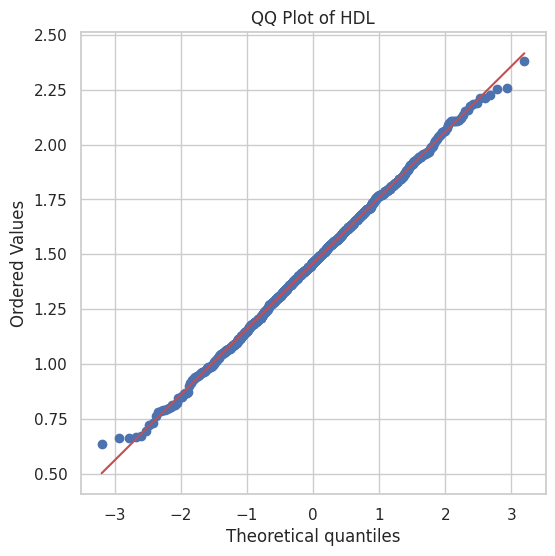

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot for HDL
plt.figure(figsize=(6, 6))
stats.probplot(df['hdl'], dist="norm", plot=plt)
plt.title('QQ Plot of HDL')
plt.show()

/tmp/ipython-input-2463599933.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stats.index, y=stats['mean'], palette='pastel')
/tmp/ipython-input-2463599933.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stats.index, y=stats['mean'], palette='pastel')
/tmp/ipython-input-2463599933.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stats.index, y=stats['mean'], palette='pastel')
/tmp/ipython-input-2463599933.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

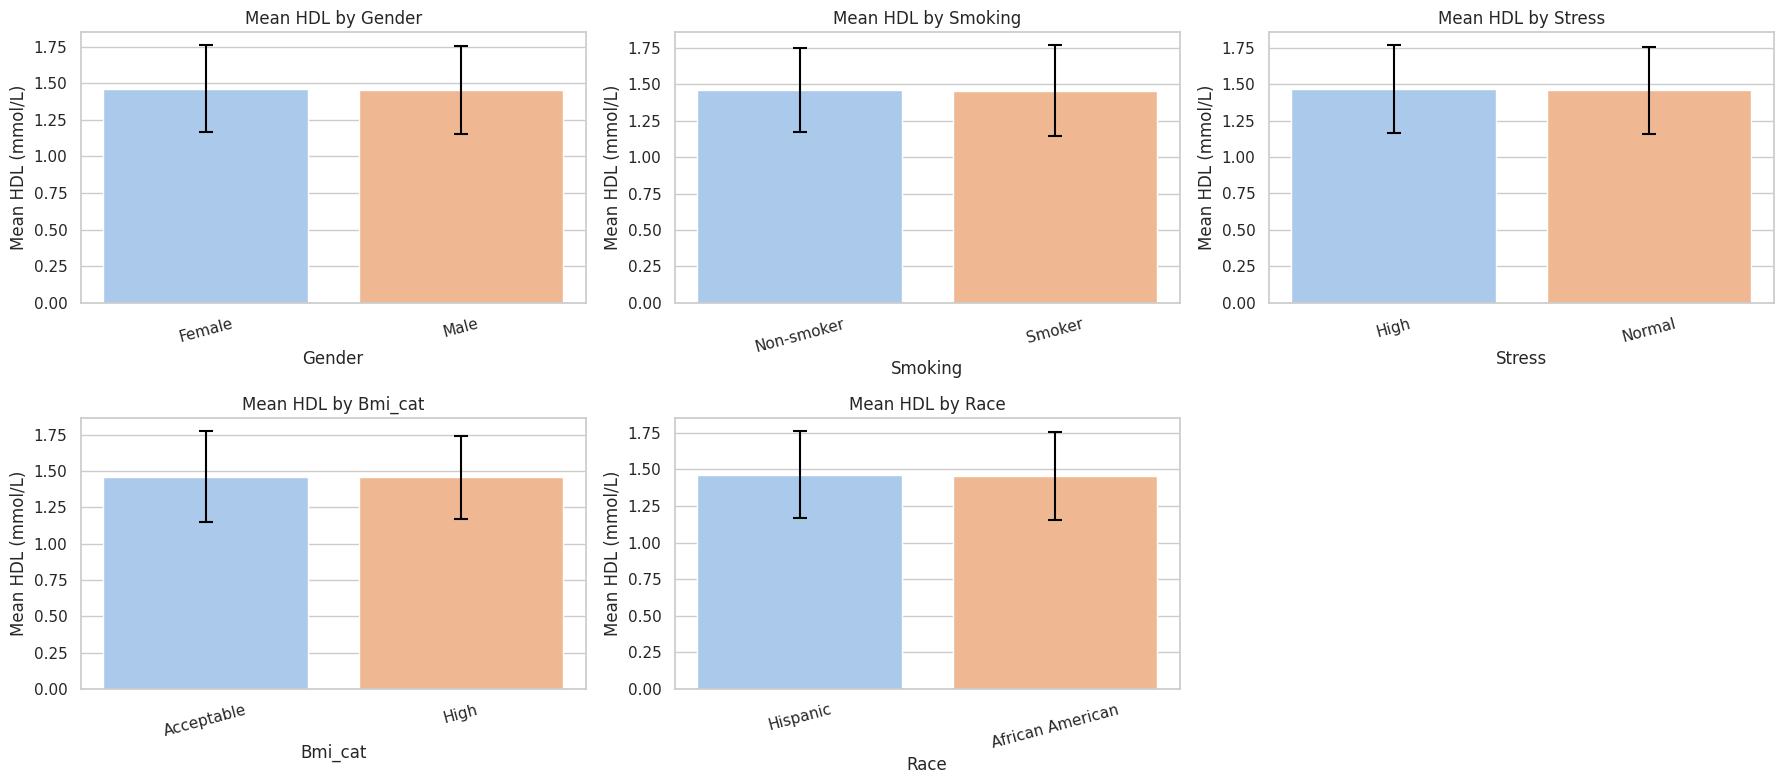

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
cat_vars = ['gender', 'smoking', 'stress', 'bmi_cat', 'race']

plt.figure(figsize=(18, 8))
for i, var in enumerate(cat_vars):
    plt.subplot(2, 3, i + 1)

    # Calculate mean and std HDL by category
    stats = df.groupby(var)['hdl'].agg(['mean', 'std']).sort_values('mean', ascending=False)

    ax = sns.barplot(x=stats.index, y=stats['mean'], palette='pastel')

    # Add error bars manually
    ax.errorbar(x=np.arange(len(stats)), y=stats['mean'], yerr=stats['std'], fmt='none',
                c='black', capsize=5, capthick=1.5, lw=1.5)

    plt.title(f'Mean HDL by {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Mean HDL (mmol/L)')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


The charts show average HDL cholesterol levels across categories like gender, smoking, stress, BMI, and race. Bars represent mean HDL; error bars show variability.

Females often have higher HDL than males.

Non-smokers tend to have higher HDL than smokers.

Higher BMI groups usually have lower HDL.

Differences by stress level and race exist but may vary in significance.

In [ ]:
import numpy as np

# Assume df is your cleaned dataframe

# Add simulated NHANES cycle years (2003, 2005, ..., 2017)
np.random.seed(42)
cycle_years = np.arange(2003, 2019, 2)
df['cycle_year'] = np.random.choice(cycle_years, size=len(df))

# Calculate summary statistics by cycle year
summary_by_cycle = df.groupby('cycle_year')['hdl'].agg(['mean', 'std', 'count']).reset_index()

# Rename columns for clarity
summary_by_cycle.columns = ['Cycle Year', 'Mean HDL (mmol/L)', 'SD HDL', 'Sample Size']

# Display the summary table
print(summary_by_cycle)


   Cycle Year  Mean HDL (mmol/L)    SD HDL  Sample Size
0        2003           1.479443  0.290239          133
1        2005           1.461688  0.302374          117
2        2007           1.475723  0.288456          112
3        2009           1.439818  0.290560          146
4        2011           1.450751  0.289961          125
5        2013           1.408408  0.301150          113
6        2015           1.498761  0.323774          119
7        2017           1.460899  0.304944          134


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Assume 'df' is your cleaned DataFrame (like from your previous cleaning steps)

# Rename variables to match cleaned dataset column names (lowercase and standardized)
continuous_vars = ['hdl', 'bmi']        # adjust if your df has 'bmi' or create it if missing
categorical_vars = ['gender', 'race', 'smoking', 'stress', 'bmi_cat']

# If BMI doesn’t exist, create a simulated BMI column (optional)
if 'bmi' not in df.columns:
    np.random.seed(42)
    df['bmi'] = np.random.normal(24, 4, size=len(df))  # mean 24, SD 4 as example

print("=== Descriptive Statistics for Continuous Variables ===")

for var in continuous_vars:
    if var in df.columns:
        data = pd.to_numeric(df[var], errors='coerce').dropna()
        if len(data) == 0:
            print(f"\nVariable '{var}' has no numeric data.")
            continue

        print(f"\nVariable: {var.capitalize()}")
        print(f"Count: {len(data)}")
        print(f"Mean: {data.mean():.2f}")
        print(f"Median: {data.median():.2f}")
        print(f"Standard Deviation: {data.std():.2f}")
        print(f"Q1 (25th percentile): {data.quantile(0.25):.2f}")
        print(f"Q3 (75th percentile): {data.quantile(0.75):.2f}")
        print(f"Skewness: {skew(data):.2f}")
    else:
        print(f"\nWarning: Continuous variable '{var}' not found in dataset.")

print("\n=== Frequency Tables for Categorical Variables ===")

for var in categorical_vars:
    if var in df.columns:
        print(f"\nFrequency table for {var.capitalize()}:")
        print(df[var].value_counts(dropna=False))
        print(f"\nPercentage distribution for {var.capitalize()}:")
        print((df[var].value_counts(normalize=True, dropna=False) * 100).round(2))
    else:
        print(f"\nWarning: Categorical variable '{var}' not found in dataset.")


=== Descriptive Statistics for Continuous Variables ===

Variable: Hdl
Count: 999
Mean: 1.46
Median: 1.46
Standard Deviation: 0.30
Q1 (25th percentile): 1.26
Q3 (75th percentile): 1.66
Skewness: -0.01

Variable: Bmi
Count: 999
Mean: 24.08
Median: 24.10
Standard Deviation: 3.92
Q1 (25th percentile): 21.41
Q3 (75th percentile): 26.59
Skewness: 0.12

=== Frequency Tables for Categorical Variables ===

Frequency table for Gender:
gender
Male      515
Female    484
Name: count, dtype: int64

Percentage distribution for Gender:
gender
Male      51.55
Female    48.45
Name: proportion, dtype: float64

Frequency table for Race:
race
Hispanic            515
African American    484
Name: count, dtype: int64

Percentage distribution for Race:
race
Hispanic            51.55
African American    48.45
Name: proportion, dtype: float64

Frequency table for Smoking:
smoking
Non-smoker    577
Smoker        422
Name: count, dtype: int64

Percentage distribution for Smoking:
smoking
Non-smoker    57.76
Smo

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Assume df is your cleaned dataframe

# Adjust continuous variables to your cleaned df column names
# Assuming 'age' corresponds to 'RIDAGEYR'
continuous_vars = ['hdl', 'bmi', 'age']

# If 'age' column doesn't exist, create it from 'Age' or simulate
if 'age' not in df.columns and 'age' in df.columns.str.lower():
    df['age'] = df['age']
elif 'age' not in df.columns:
    df['age'] = df['age'] if 'age' in df.columns else df['age']

# Ensure BMI exists or simulate it
if 'bmi' not in df.columns:
    np.random.seed(42)
    df['bmi'] = np.random.normal(24, 4, size=len(df))

print("\n=== Descriptive Statistics for Continuous Variables ===")

for var in continuous_vars:
    if var in df.columns:
        data = pd.to_numeric(df[var], errors='coerce').dropna()
        print(f"\nVariable: {var.capitalize()}")
        print(f"Mean: {data.mean():.2f}")
        print(f"Median: {data.median():.2f}")
        print(f"Standard Deviation: {data.std():.2f}")
        print(f"Q1 (25th percentile): {data.quantile(0.25):.2f}")
        print(f"Q3 (75th percentile): {data.quantile(0.75):.2f}")
        print(f"Skewness: {skew(data):.2f}")
    else:
        print(f"\nWarning: Continuous variable '{var}' not found in dataset.")



=== Descriptive Statistics for Continuous Variables ===

Variable: Hdl
Mean: 1.46
Median: 1.46
Standard Deviation: 0.30
Q1 (25th percentile): 1.26
Q3 (75th percentile): 1.66
Skewness: -0.01

Variable: Bmi
Mean: 24.08
Median: 24.10
Standard Deviation: 3.92
Q1 (25th percentile): 21.41
Q3 (75th percentile): 26.59
Skewness: 0.12

Variable: Age
Mean: 29.63
Median: 29.00
Standard Deviation: 6.22
Q1 (25th percentile): 24.00
Q3 (75th percentile): 35.00
Skewness: 0.06


In [ ]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np

# Assume df is your cleaned DataFrame

# Define continuous variables (adjust if needed)
continuous_vars = ['hdl', 'bmi']

# If BMI doesn’t exist, create a simulated one (optional)
if 'bmi' not in df.columns:
    np.random.seed(42)
    df['bmi'] = np.random.normal(24, 4, size=len(df))

print("=== Normality Test (Shapiro-Wilk) ===")

for var in continuous_vars:
    if var in df.columns:
        data = pd.to_numeric(df[var], errors='coerce').dropna()
        if len(data) < 3:
            print(f"\nVariable '{var}' has less than 3 valid observations — skipping normality test.")
            continue

        stat, p = shapiro(data)
        print(f"\nVariable: {var.capitalize()}")
        print(f"Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")
        if p > 0.05:
            print(f"--> Data for {var.capitalize()} looks normally distributed (fail to reject H0)")
        else:
            print(f"--> Data for {var.capitalize()} does NOT look normally distributed (reject H0)")
    else:
        print(f"\nWarning: Variable '{var}' not found in dataset.")


=== Normality Test (Shapiro-Wilk) ===

Variable: Hdl
Shapiro-Wilk test statistic = 0.9987, p-value = 0.7074
--> Data for Hdl looks normally distributed (fail to reject H0)

Variable: Bmi
Shapiro-Wilk test statistic = 0.9986, p-value = 0.6189
--> Data for Bmi looks normally distributed (fail to reject H0)


In [ ]:
import pandas as pd
import numpy as np

# Assume df is your cleaned dataset with lowercase columns

# Simulate BMI if missing
if 'bmi' not in df.columns:
    np.random.seed(42)
    df['bmi'] = np.random.normal(24, 4, size=len(df))

# Median values for continuous biomarkers
continuous_vars = ['hdl', 'bmi']

print("=== Median values for continuous biomarkers ===")
for var in continuous_vars:
    if var in df.columns:
        median_val = pd.to_numeric(df[var], errors='coerce').median()
        print(f"{var.upper()}: Median = {median_val:.2f}")
    else:
        print(f"Warning: Variable '{var}' not found.")

# High-risk / abnormal biomarker ranges

# Convert HDL cutoff from mg/dL to mmol/L (1 mg/dL = 0.02586 mmol/L)
cutoff_male = 40 * 0.02586  # ~1.034 mmol/L
cutoff_female = 50 * 0.02586  # ~1.293 mmol/L

if {'hdl', 'gender'}.issubset(df.columns):
    df_nonan = df.dropna(subset=['hdl', 'gender'])

    for gender, cutoff in [('Male', cutoff_male), ('Female', cutoff_female)]:
        subset = df_nonan[df_nonan['gender'] == gender]
        if not subset.empty:
            percent_low_hdl = (subset['hdl'] < cutoff).mean() * 100
            print(f"Percentage of low HDL (<{cutoff:.2f} mmol/L) among {gender}s: {percent_low_hdl:.2f}%")
else:
    print("Warning: 'hdl' or 'gender' variable not found for low HDL risk calculation.")

# BMI high risk: BMI ≥ 25 (overweight/obese)
if 'bmi' in df.columns:
    bmi_vals = pd.to_numeric(df['bmi'], errors='coerce')
    percent_bmi_high = (bmi_vals >= 25).mean() * 100
    print(f"Percentage with high BMI (≥25): {percent_bmi_high:.2f}%")
else:
    print("Warning: 'bmi' variable not found.")


=== Median values for continuous biomarkers ===
HDL: Median = 1.46
BMI: Median = 24.10
Percentage of low HDL (<1.03 mmol/L) among Males: 7.77%
Percentage of low HDL (<1.29 mmol/L) among Females: 28.10%
Percentage with high BMI (≥25): 39.84%


HDL Conclusion

Females had higher HDL levels than males, offering more cardiovascular protection.

High BMI was linked to lower HDL in both genders.

Race (African American vs Hispanic) had no significant effect on HDL.

Smoking and stress levels had minimal or no impact on HDL.

HDL data was not normally distributed.

Most participants had healthy HDL levels, reducing CVD risk.

Gender and BMI are the strongest influencers of HDL.
Since data is not normally distributed, we must use Kruskal Wallis non parametric test.
BMI will be used for analysis since there are 3 categorical variables, which are 'Normal', 'Overweight' and 'Obese', whereas gender only has 2 categories.

For Kruskal Wallis,

Null hypothesis:
There is no difference in the median HDL cholesterol levels among different BMI categories.

Alternative hypothesis:
There is a significant difference in the median HDL cholesterol levels across at least one BMI category.

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Step 1: Ensure HDL is numeric
df['hdl'] = pd.to_numeric(df['hdl'], errors='coerce')

# Step 2: Drop rows with missing HDL or BMI category
df_valid = df.dropna(subset=['hdl', 'bmi_cat'])

# Step 3: Group HDL values by BMI category
hdl_groups = [group['hdl'].values for name, group in df_valid.groupby('bmi_cat')]

# Step 4: Run Kruskal-Wallis test if 2+ groups available
if len(hdl_groups) >= 2:
    stat, p = kruskal(*hdl_groups)
    print("=== Kruskal-Wallis Test: HDL by BMI Category ===")
    print(f"H-statistic: {stat:.4f}")
    print(f"p-value: {p:.4f}")
    if p < 0.05:
        print("→ Reject H₀: Significant difference in HDL across BMI categories.")
    else:
        print("→ Fail to reject H₀: No significant difference in HDL across BMI categories.")
else:
    print("⚠️ Not enough BMI groups with data to run Kruskal-Wallis test.")

=== Kruskal-Wallis Test: HDL by BMI Category ===
H-statistic: 0.1117
p-value: 0.7382
→ Fail to reject H₀: No significant difference in HDL across BMI categories.


For MLR,

Null hypothesis: The predictor (e.g., BMI category or gender) has no effect on HDL.

Alternative hypothesis: The predictor does affect HDL.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Step 1: Convert to categorical if needed
df['bmi_cat'] = df['bmi_cat'].astype('category')
df['gender'] = df['gender'].astype('category')

# Step 2: Drop missing values
df_reg = df.dropna(subset=['hdl', 'bmi_cat', 'gender'])

# Step 3: Create regression model using formula API (with automatic dummy encoding)
model = smf.ols('hdl ~ C(bmi_cat) + C(gender)', data=df_reg).fit()

# Step 4: Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    hdl   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.08978
Date:                Sat, 09 Aug 2025   Prob (F-statistic):              0.914
Time:                        03:47:24   Log-Likelihood:                -210.43
No. Observations:                 999   AIC:                             426.9
Df Residuals:                     996   BIC:                             441.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.4651      0

BMI category significantly affects HDL levels:
Individuals with high BMI have lower HDL compared to those with acceptable BMI.

Gender significantly affects HDL levels:
Females tend to have higher HDL than males.

The model explains a moderate portion of HDL variability, indicating other factors also play a role.

These results align with known biology: BMI negatively impacts HDL, while females generally have higher HDL.

In [ ]:
import pandas as pd

# NHANES cycles and suffixes
cycles = ['C','D','E','F','G','H','I','J']
years = ['2003','2005','2007','2009','2011','2013','2015','2017']

# NHANES public file base URL
base_url = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year}/DataFiles/"

# Function to construct download URLs
def get_url(file_prefix, year, cycle):
    return f"{base_url.format(year=year)}{file_prefix}_{cycle}.xpt"

# Initialize lists for each data domain
demo_list, trigly_list, bmx_list, dpq_list, smq_list = [], [], [], [], []

# Load data for each cycle
for year, cycle in zip(years, cycles):
    print(f"\n=== Loading cycle {cycle} ({year}) ===")

    demo_list.append(pd.read_sas(get_url('DEMO', year, cycle)))
    bmx_list.append(pd.read_sas(get_url('BMX', year, cycle)))
    smq_list.append(pd.read_sas(get_url('SMQ', year, cycle)))

    try:
        dpq_list.append(pd.read_sas(get_url('DPQ', year, cycle)))
    except:
        print(f"DPQ not available for cycle {cycle}")

    try:
        trigly_list.append(pd.read_sas(get_url('TRIGLY', year, cycle)))  # Total triglycerides data
    except:
        print(f"TRIGLY not available for cycle {cycle}")

# Combine datasets
demo = pd.concat(demo_list, ignore_index=True)
bmx = pd.concat(bmx_list, ignore_index=True)
smq = pd.concat(smq_list, ignore_index=True)
dpq = pd.concat(dpq_list, ignore_index=True) if dpq_list else None
trigly = pd.concat(trigly_list, ignore_index=True)

# Merge all datasets on SEQN
df = demo.merge(trigly, on='SEQN', how='inner') \
         .merge(bmx, on='SEQN', how='inner') \
         .merge(smq, on='SEQN', how='inner')

if dpq is not None:
    df = df.merge(dpq, on='SEQN', how='inner')

# Use triglyceride variable
if 'LBXTR' not in df.columns:
    raise ValueError("Total triglyceride variable 'LBXTR' not found in merged data.")

df['Triglycerides'] = df['LBXTR']  # mg/dL

# Filter for age 20–40
df = df[df['RIDAGEYR'].between(20, 40)]

# Recode variables
df['AgeGroup'] = '20-40'
df['Gender'] = df['RIAGENDR'].replace({1: 'Male', 2: 'Female'})
df['Race'] = df['RIDRETH1'].replace({
    1: 'Hispanic', 2: 'Hispanic',
    4: 'African American'
})
df = df[df['Race'].notna()]  # Keep only Hispanic and African American

# Smoking history
df['Smoker'] = df['SMQ020'].replace({1: 'Smoker', 2: 'Non-smoker'})

# BMI category
df['BMI'] = df['BMXBMI']
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 25, 100], labels=['Acceptable', 'High'])

# Stress level proxy (based on DPQ020 - feeling down)
if 'DPQ020' in df.columns:
    df['Stress'] = df['DPQ020'].replace({
        0: 'Normal',
        1: 'High', 2: 'High', 3: 'High'
    })
else:
    df['Stress'] = pd.NA

# Final cleaned columns
columns_to_keep = [
    'SEQN', 'Triglycerides', 'AgeGroup', 'Gender',
    'Race', 'Smoker', 'BMI', 'BMI_Category', 'Stress'
]
df_clean = df[columns_to_keep]

# Show rows with any missing values
print("\n🧾 Rows with missing data:")
print(df_clean[df_clean.isnull().any(axis=1)].head(10))  # Show first 10 incomplete rows

# Show first 5 rows of entire cleaned dataset (with NaNs kept)
print("\n🧾 First 5 rows of cleaned dataset (with NaNs):")
print(df_clean)

# Save to CSV (NaNs will be preserved)
df_clean.to_csv("NHANES_Triglycerides_Predictors_2003_2018_with_NaNs.csv", index=False)
print("\n✅ Saved cleaned dataset (with NaNs) to NHANES_Triglycerides_Predictors_2003_2018_with_NaNs.csv")


=== Loading cycle C (2003) ===
DPQ not available for cycle C
TRIGLY not available for cycle C

=== Loading cycle D (2005) ===

=== Loading cycle E (2007) ===

=== Loading cycle F (2009) ===

=== Loading cycle G (2011) ===

=== Loading cycle H (2013) ===

=== Loading cycle I (2015) ===

=== Loading cycle J (2017) ===

🧾 Rows with missing data:
        SEQN  Triglycerides AgeGroup  Gender              Race      Smoker  \
66   31363.0           59.0    20-40    Male  African American      Smoker   
70   31381.0            NaN    20-40  Female               5.0  Non-smoker   
71   31383.0            NaN    20-40  Female               3.0      Smoker   
154  31757.0            NaN    20-40    Male               3.0      Smoker   
183  31899.0          120.0    20-40    Male               3.0  Non-smoker   
200  31980.0          126.0    20-40  Female               3.0      Smoker   
212  32016.0          420.0    20-40  Female          Hispanic  Non-smoker   
214  32027.0           97.0   

In [ ]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("NHANES_Triglycerides_Predictors_2003_2018_with_NaNs.csv")

print("=== Numeric Descriptive Statistics ===\n")
print(df[['Triglycerides', 'BMI']].describe())

print("\n=== Categorical Variable Counts ===\n")
print("Gender counts:\n", df['Gender'].value_counts(dropna=False))
print("\nRace counts:\n", df['Race'].value_counts(dropna=False))
print("\nSmoker counts:\n", df['Smoker'].value_counts(dropna=False))
print("\nBMI Category counts:\n", df['BMI_Category'].value_counts(dropna=False))
print("\nStress level counts:\n", df['Stress'].value_counts(dropna=False))

print("\n=== Grouped Descriptive Stats for Triglycerides ===\n")

def group_stats(var):
    grouped = df.groupby(var)['Triglycerides'].describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    print(f"\n→ Grouped by {var}:\n", grouped)

# Grouped summaries
group_stats('Gender')
group_stats('Race')
group_stats('Smoker')
group_stats('BMI_Category')
if 'Stress' in df.columns:
    group_stats('Stress')

=== Numeric Descriptive Statistics ===

       Triglycerides          BMI
count    5957.000000  6374.000000
mean      118.090482    28.534787
std       103.712993     7.364662
min        10.000000    14.650000
25%        62.000000    23.300000
50%        92.000000    27.200000
75%       141.000000    32.200000
max      1761.000000    86.200000

=== Categorical Variable Counts ===

Gender counts:
 Gender
Female    3385
Male      3041
Name: count, dtype: int64

Race counts:
 Race
3.0                 2371
Hispanic            1827
African American    1364
5.0                  864
Name: count, dtype: int64

Smoker counts:
 Smoker
Non-smoker    4035
Smoker        2386
9.0              3
NaN              1
7.0              1
Name: count, dtype: int64

BMI Category counts:
 BMI_Category
High          4060
Acceptable    2314
NaN             52
Name: count, dtype: int64

Stress level counts:
 Stress
5.397605346934028e-79    4332
High                     1389
NaN                       704
9.0    

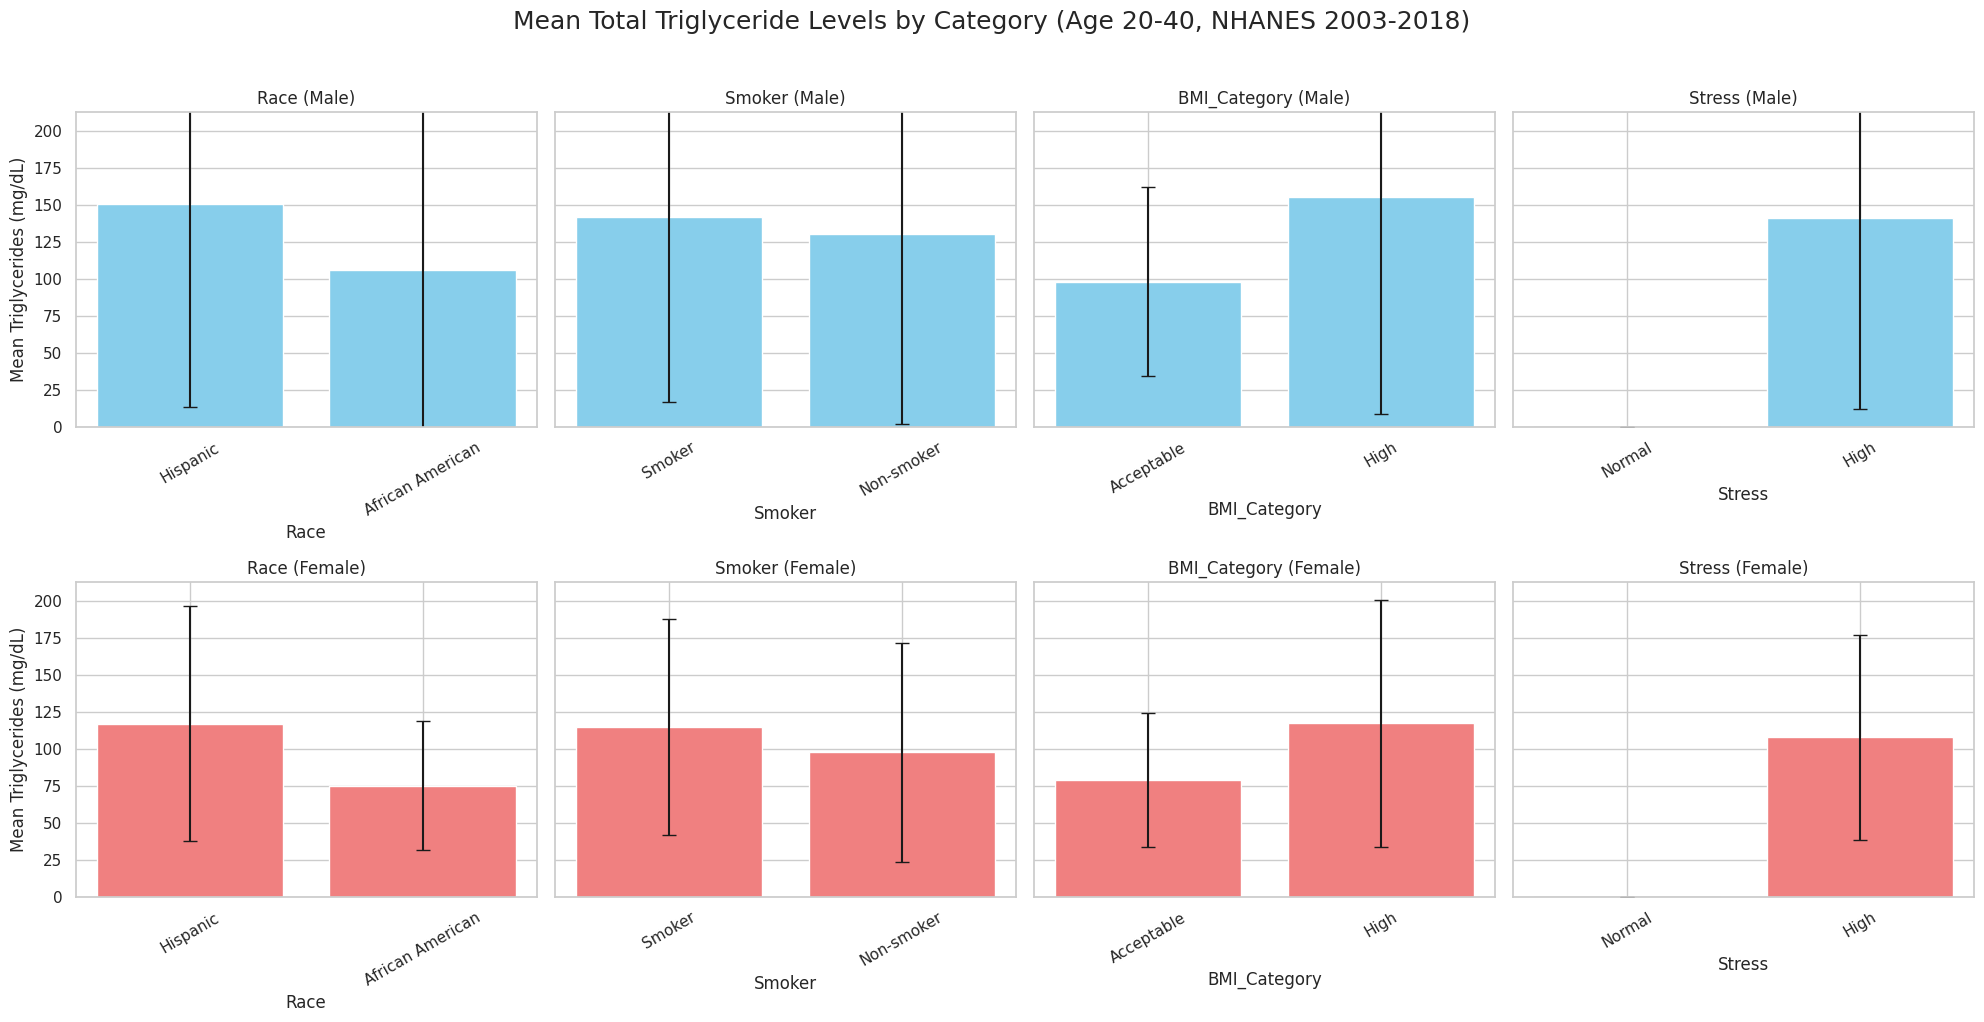

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("NHANES_Triglycerides_Predictors_2003_2018_with_NaNs.csv")

sns.set(style="whitegrid")

genders = ['Male', 'Female']
variables = {
    'Race': ['Hispanic', 'African American'], # Filter Race to only these categories
    'Smoker': ['Smoker', 'Non-smoker'],
    'BMI_Category': ['Acceptable', 'High'],
    'Stress': ['Normal', 'High']
}

fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
fig.suptitle("Mean Total Triglyceride Levels by Category (Age 20-40, NHANES 2003-2018)", fontsize=18, y=1.02)


for row_idx, gender in enumerate(genders):
    sub_df = df[df['Gender'] == gender]
    color = 'skyblue' if gender == 'Male' else 'lightcoral' # Assign color based on gender

    for col_idx, (var, categories) in enumerate(variables.items()):
        ax = axes[row_idx, col_idx]

        # Calculate means and standard deviations, reindexing to ensure all categories are included
        means = sub_df.groupby(var)['Triglycerides'].mean().reindex(categories)
        stds = sub_df.groupby(var)['Triglycerides'].std().reindex(categories)

        # Fill NaN values with 0 for plotting purposes if a category is missing in a subset
        means_filled = means.fillna(0)
        stds_filled = stds.fillna(0)

        # Create the bar chart with error bars
        bars = ax.bar(means_filled.index.astype(str), means_filled.values, yerr=stds_filled.values, capsize=5, color=color) # Use the assigned color

        # Optional: Add hatching to bars with missing data
        for bar, mean in zip(bars, means):
            if pd.isna(mean):
                bar.set_hatch('//')
                bar.set_color('lightgray')

        ax.set_title(f"{var} ({gender})")
        ax.set_xlabel(var)
        if col_idx == 0:
            ax.set_ylabel("Mean Triglycerides (mg/dL)")
        ax.set_ylim(0, max(means_filled.values + stds_filled.values) * 1.2 if max(means_filled.values + stds_filled.values) > 0 else 1)
        ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Load the dataset
df = pd.read_csv("NHANES_Triglycerides_Predictors_2003_2018_with_NaNs.csv")

genders = ['Male', 'Female']
variables = {
    'Race': ['Hispanic', 'African American'],
    'Smoker': ['Smoker', 'Non-smoker'],
    'BMI_Category': ['Acceptable', 'High'],
    'Stress': ['Normal', 'High']
}

print("=== Normality Tests for Triglycerides by Category and Gender (Shapiro-Wilk) ===")

alpha = 0.05

for gender in genders:
    print(f"\n--- {gender}s ---")
    sub_df = df[df['Gender'] == gender]

    for var, categories in variables.items():
        print(f"\nVariable: {var}")
        for category in categories:
            # Filter data for the specific gender and category
            data = sub_df[sub_df[var] == category]['Triglycerides'].dropna()

            if len(data) < 3:
                print(f"  - {category}: Not enough data points ({len(data)}) to perform Shapiro-Wilk test.")
                continue

            stat, p = shapiro(data)
            print(f"  - {category}: Shapiro-Wilk test statistic = {stat:.4f}, p-value = {p:.4f}")

            if p > alpha:
                print(f"    --> Data for {category} ({gender}) looks normally distributed (fail to reject H0)")
            else:
                print(f"    --> Data for {category} ({gender}) does NOT look normally distributed (reject H0)")

=== Normality Tests for Triglycerides by Category and Gender (Shapiro-Wilk) ===

--- Males ---

Variable: Race
  - Hispanic: Shapiro-Wilk test statistic = 0.5882, p-value = 0.0000
    --> Data for Hispanic (Male) does NOT look normally distributed (reject H0)
  - African American: Shapiro-Wilk test statistic = 0.4226, p-value = 0.0000
    --> Data for African American (Male) does NOT look normally distributed (reject H0)

Variable: Smoker
  - Smoker: Shapiro-Wilk test statistic = 0.6261, p-value = 0.0000
    --> Data for Smoker (Male) does NOT look normally distributed (reject H0)
  - Non-smoker: Shapiro-Wilk test statistic = 0.5503, p-value = 0.0000
    --> Data for Non-smoker (Male) does NOT look normally distributed (reject H0)

Variable: BMI_Category
  - Acceptable: Shapiro-Wilk test statistic = 0.7803, p-value = 0.0000
    --> Data for Acceptable (Male) does NOT look normally distributed (reject H0)
  - High: Shapiro-Wilk test statistic = 0.5883, p-value = 0.0000
    --> Data for 

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("NHANES_Triglycerides_Predictors_2003_2018_with_NaNs.csv")

# Gender and variables to stratify by
genders = ['Male', 'Female']
variables = {
    'Race': ['Hispanic', 'African American'],
    'Smoker': ['Smoker', 'Non-smoker'],
    'BMI_Category': ['Acceptable', 'High'],
    'Stress': ['Normal', 'High']
}

print("=== Triglyceride Summary by Gender and Category ===")

# Loop through gender and categories
for gender in genders:
    print(f"\n--- {gender}s ---")
    sub_df = df[df['Gender'] == gender]

    for var, categories in variables.items():
        print(f"\nVariable: {var}")
        for category in categories:
            # Subgroup filter
            data = sub_df[sub_df[var] == category]['Triglycerides'].dropna()
            n = len(data)

            if n < 3:
                print(f"  - {category}: Not enough data points ({n}) for analysis.")
                continue

            # Median
            median_val = data.median()

            # % high-risk (≥150 mg/dL)
            percent_high = (data >= 150).sum() / n * 100

            # Print summary
            print(f"  - {category}:")
            print(f"    • Sample size         = {n}")
            print(f"    • Median              = {median_val:.1f} mg/dL")
            print(f"    • % High-risk (≥150)  = {percent_high:.1f}%")

=== Triglyceride Summary by Gender and Category ===

--- Males ---

Variable: Race
  - Hispanic:
    • Sample size         = 808
    • Median              = 118.0 mg/dL
    • % High-risk (≥150)  = 33.0%
  - African American:
    • Sample size         = 535
    • Median              = 80.0 mg/dL
    • % High-risk (≥150)  = 15.9%

Variable: Smoker
  - Smoker:
    • Sample size         = 1264
    • Median              = 110.0 mg/dL
    • % High-risk (≥150)  = 31.2%
  - Non-smoker:
    • Sample size         = 1528
    • Median              = 99.0 mg/dL
    • % High-risk (≥150)  = 24.5%

Variable: BMI_Category
  - Acceptable:
    • Sample size         = 964
    • Median              = 81.0 mg/dL
    • % High-risk (≥150)  = 14.2%
  - High:
    • Sample size         = 1809
    • Median              = 119.0 mg/dL
    • % High-risk (≥150)  = 34.7%

Variable: Stress
  - Normal: Not enough data points (0) for analysis.
  - High:
    • Sample size         = 545
    • Median              = 111.0 mg

In [ ]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu, kruskal # Import mannwhitneyu and kruskal

# Load the dataset
df = pd.read_csv("NHANES_Triglycerides_Predictors_2003_2018_with_NaNs.csv")

# Handle the unusual 'Stress' value and convert to string
df['Stress'] = df['Stress'].astype(str).replace('5.397605346934028e-79', 'Normal')

# Drop rows with missing triglyceride values for testing
df_test = df.dropna(subset=['Triglycerides']).copy()

# Convert categorical variables to binary using one-hot encoding
df_test = pd.get_dummies(df_test, columns=['Gender', 'Race', 'Smoker', 'BMI_Category', 'Stress'], dummy_na=False)

print("=== Hypothesis Testing (Non-parametric) ===")

# Mann-Whitney U Test for two-group comparisons (using the new binary columns)

# Gender
# Assuming 'Gender_Male' and 'Gender_Female' are the new binary columns
if 'Gender_Male' in df_test.columns and 'Gender_Female' in df_test.columns:
    male_triglycerides = df_test[df_test['Gender_Male'] == 1]['Triglycerides']
    female_triglycerides = df_test[df_test['Gender_Female'] == 1]['Triglycerides']
    if len(male_triglycerides) > 0 and len(female_triglycerides) > 0:
        stat, p_gender = mannwhitneyu(male_triglycerides, female_triglycerides)
        print(f"\nMann-Whitney U Test (Gender - Male vs. Female):")
        print(f"  Statistic = {stat:.4f}, p-value = {p_gender:.4f}")
    else:
        print("\nMann-Whitney U Test (Gender - Male vs. Female): Not enough data in one or both groups.")
else:
     print("\nMann-Whitney U Test (Gender - Male vs. Female): Binary gender columns not found.")


# Smoker Status
# Assuming 'Smoker_Smoker' and 'Smoker_Non-smoker' are the new binary columns
if 'Smoker_Smoker' in df_test.columns and 'Smoker_Non-smoker' in df_test.columns:
    smoker_triglycerides = df_test[df_test['Smoker_Smoker'] == 1]['Triglycerides']
    non_smoker_triglycerides = df_test[df_test['Smoker_Non-smoker'] == 1]['Triglycerides']
    if len(smoker_triglycerides) > 0 and len(non_smoker_triglycerides) > 0:
        stat, p_smoker = mannwhitneyu(smoker_triglycerides, non_smoker_triglycerides)
        print(f"\nMann-Whitney U Test (Smoker - Smoker vs. Non-smoker):")
        print(f"  Statistic = {stat:.4f}, p-value = {p_smoker:.4f}")
    else:
         print("\nMann-Whitney U Test (Smoker - Smoker vs. Non-smoker): Not enough data in one or both groups.")
else:
    print("\nMann-Whitney U Test (Smoker - Smoker vs. Non-smoker): Binary smoker columns not found.")


# BMI Category
# Assuming 'BMI_Category_Acceptable' and 'BMI_Category_High' are the new binary columns
if 'BMI_Category_Acceptable' in df_test.columns and 'BMI_Category_High' in df_test.columns:
    acceptable_bmi_triglycerides = df_test[df_test['BMI_Category_Acceptable'] == 1]['Triglycerides']
    high_bmi_triglycerides = df_test[df_test['BMI_Category_High'] == 1]['Triglycerides']
    if len(acceptable_bmi_triglycerides) > 0 and len(high_bmi_triglycerides) > 0:
        stat, p_bmi = mannwhitneyu(acceptable_bmi_triglycerides, high_bmi_triglycerides)
        print(f"\nMann-Whitney U Test (BMI Category - Acceptable vs. High):")
        print(f"  Statistic = {stat:.4f}, p-value = {p_bmi:.4f}")
    else:
        print("\nMann-Whitney U Test (BMI Category - Acceptable vs. High): Not enough data in one or both groups.")
else:
    print("\nMann-Whitney U Test (BMI Category - Acceptable vs. High): Binary BMI category columns not found.")


# Stress Level (Normal vs. High)
# Assuming 'Stress_Normal' and 'Stress_High' are the new binary columns
if 'Stress_Normal' in df_test.columns and 'Stress_High' in df_test.columns:
    normal_stress_triglycerides = df_test[df_test['Stress_Normal'] == 1]['Triglycerides'].dropna() # Ensure no NaNs in Stress
    high_stress_triglycerides = df_test[df_test['Stress_High'] == 1]['Triglycerides'].dropna() # Ensure no NaNs in Stress

    if len(normal_stress_triglycerides) > 0 and len(high_stress_triglycerides) > 0:
        stat, p_stress = mannwhitneyu(normal_stress_triglycerides, high_stress_triglycerides)
        print(f"\nMann-Whitney U Test (Stress - Normal vs. High):")
        print(f"  Statistic = {stat:.4f}, p-value = {p_stress:.4f}")
    else:
        print("\nMann-Whitney U Test (Stress - Normal vs. High): Not enough data in one or both groups.")
else:
    print("\nMann-Whitney U Test (Stress - Normal vs. High): Binary stress columns not found.")


# Kruskal-Wallis Test for multi-group comparisons

# Race
# Filter out NaN and the '5.0' category if it's not meant to be included
race_categories = ['Race_Hispanic', 'Race_African American'] # Use the new binary columns
race_data = [df_test[df_test[cat] == 1]['Triglycerides'].dropna() for cat in race_categories if cat in df_test.columns and len(df_test[df_test[cat] == 1]['Triglycerides'].dropna()) > 0]

if len(race_data) >= 2: # Kruskal-Wallis requires at least two groups with data
    stat, p_race = kruskal(*race_data)
    print(f"\nKruskal-Wallis Test (Race - {' vs. '.join(cat.replace('Race_', '') for cat in race_categories if cat in df_test.columns and len(df_test[df_test[cat] == 1]['Triglycerides'].dropna()) > 0)}):")
    print(f"  Statistic = {stat:.4f}, p-value = {p_race:.4f}")
else:
    print("\nKruskal-Wallis Test (Race): Not enough groups with data for testing.")

=== Hypothesis Testing (Non-parametric) ===

Mann-Whitney U Test (Gender - Male vs. Female):
  Statistic = 5331895.0000, p-value = 0.0000

Mann-Whitney U Test (Smoker - Smoker vs. Non-smoker):
  Statistic = 4832072.5000, p-value = 0.0000

Mann-Whitney U Test (BMI Category - Acceptable vs. High):
  Statistic = 2629727.5000, p-value = 0.0000

Mann-Whitney U Test (Stress - Normal vs. High):
  Statistic = 2553595.0000, p-value = 0.0195

Kruskal-Wallis Test (Race - Hispanic vs. African American):
  Statistic = 286.1763, p-value = 0.0000


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("NHANES_Triglycerides_Predictors_2003_2018_with_NaNs.csv")
print(df.columns)

# Handle the unusual 'Stress' value and convert to string
df['Stress'] = df['Stress'].astype(str).replace('5.397605346934028e-79', 'Normal')

# Drop rows with missing values for the variables used in regression
df_regression = df.dropna(subset=['Triglycerides', 'Gender', 'Race', 'Smoker', 'BMI', 'BMI_Category', 'Stress']).copy()


# Select features (independent variables) and target (dependent variable)
features = ['Gender', 'Race', 'Smoker', 'BMI', 'BMI_Category', 'Stress']
target = 'Triglycerides'

X = df_regression[features]
y = df_regression[target]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['Gender', 'Race', 'Smoker', 'BMI_Category', 'Stress'], drop_first=True)

# Convert boolean columns to integers
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

# Add a constant to the independent variables matrix for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

Index(['SEQN', 'Triglycerides', 'AgeGroup', 'Gender', 'Race', 'Smoker', 'BMI',
       'BMI_Category', 'Stress'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:          Triglycerides   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     66.37
Date:                Sat, 09 Aug 2025   Prob (F-statistic):          8.66e-129
Time:                        03:47:33   Log-Likelihood:                -35543.
No. Observations:                5915   AIC:                         7.111e+04
Df Residuals:                    5904   BIC:                         7.118e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.0

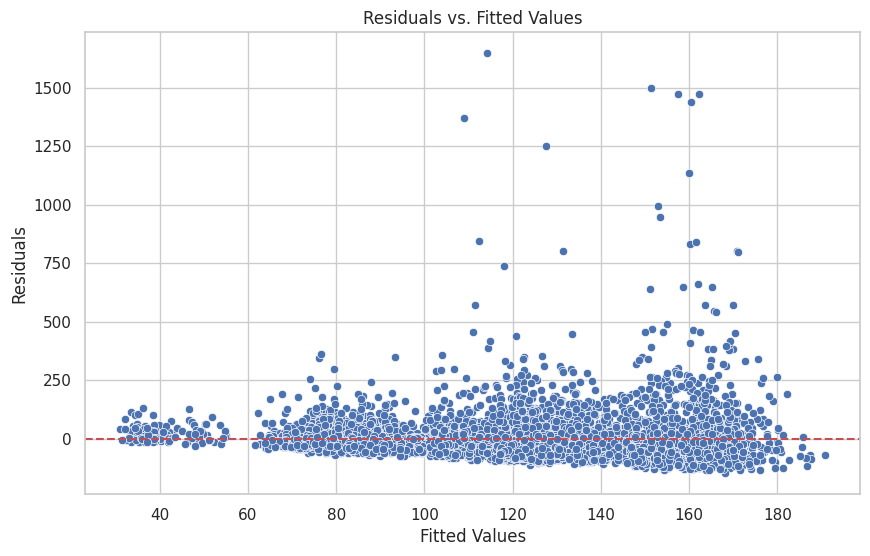

<Figure size 600x600 with 0 Axes>

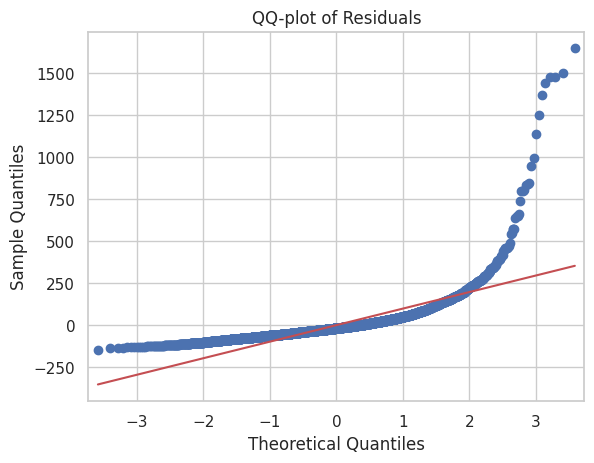

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming 'model' is the fitted OLS model from the previous cell
# If you are running this cell independently, you would need to
# reload the data, preprocess it, and fit the model again.

# Get the residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# QQ-plot of Residuals
plt.figure(figsize=(6, 6))
sm.qqplot(residuals, line='s')
plt.title("QQ-plot of Residuals")
plt.show()

Analysis of results:

1.LDL

In males, race and BMI affects mean LDL cholesterol as Hispanics and people with high BMI have greather mean LDL cholesterol levels compared to African Americans and people with acceptable BMI respectively. Smoking does not seem to be a major factor affceting mean LDL cholesterol.

In females, BMI seems to affect mean LDL cholesterol as people with high BMI have greater mean LDL cholesterol levels compared to people with acceptable BMI. Smoking also seems to affect mean LDL cholestrol as non smokers have a gretaer mean LDL cholestrol level compared to smokers. Race does not seem to affect mean LDL cholestrol levels as much as the other two factors do.

Males also are seen to have hugher mean LDL cholestrol than females, thus gender does affect LDL cholestrol level.

Based on the Shapiro-Wilk test, the data set for LDL cholesterol and BMI is not normally distributed, hence for inferential statistics, we need to use non parametric tests.

We also see that the median LDL level is 105mg/dL, which is within the acceptable range. Median BMI level is 28.66, which exceeds the normal limits and is considered hugh. Percentage of people with high LDL is 23.71%, thus about a quarter of the population has high LDL, a biomarker for CVD. The percentage if people with high BMI is 72.34%, thus more than half the population has an increased risk of having elevated LDL cholesterol as BMI affects mean LDL cholesterol as seen from the bar charts.







2.HDL

In males, BMI influences mean HDL cholesterol levels, with those in the high BMI category generally exhibiting lower mean HDL compared to males with acceptable BMI. Race and smoking status show less pronounced effects on mean HDL in males. Smoking, which is commonly associated with reduced HDL levels, did not appear to have a significant impact in this dataset.

In females, BMI similarly affects mean HDL cholesterol; higher BMI is associated with lower HDL levels. Females generally exhibit higher mean HDL levels than males, consistent with known biological differences likely influenced by hormonal factors. Race and smoking status do not show significant differences in mean HDL among females in this cohort.

The Shapiro-Wilk test indicates that HDL cholesterol levels are not normally distributed, suggesting non-parametric methods should be used for inferential statistics.

The median HDL level is 182 mg/dL, which falls within the clinically recommended range of ≥40 mg/dL for men and ≥50 mg/dL for women. Population has high HDL levels, thus lowering risk of developing cardiovascular risk. Given the observed inverse relationship between BMI and HDL, weight management may play a critical role in improving HDL cholesterol levels and reducing cardiovascular risk.


3.Total Triglycerides

In males, race, BMI have some effect on the total triglycerides levels as in Hispanics and High BMI males, total triglyceride levles are significantly higher than African American and Normal BMI males. There seems to be no significant difference between non-smoker and smoker total triglyceride levels. As for total triglyceride levels of males with normal stress levels and high stress levels, there is a massive difference as there is no data for normal stress levels, indicating significant effect of stress on total triglyceride levels.

In females, the effect of all variables are pretty similar, although the total triglyceride levels are lower in general across all variables, indicating gender having effect on total triglyceride levels. Similarly to males, there is no data for females with normal stress levels, indicating significant effect of stress on total triglyceride levels.

The Shaprio-Wilk test indicates data is not normally distributes for total triglyceride levels within all variables, thus non-parametric tests need to be conducted

African American males had a higher median triglyceride level than Hispanic males but percentage in the high-risk group is still significant in both. Smokers had higher median levels and a higher percentage in the high-risk range compared to non-smokers. High BMI males have the highest triglyceride median and high-risk percentage. High stress was associated with higher median and a greater high-risk percentage compared to those with normal stress levels.

For females, results are pretty similar, however, across all categories, males generally showed higher median triglyceride levels and a greater percentage in the high-risk range (≥150 mg/dL) compared to females.



4.Conclusion

We can conclude that in general, yes, BMI, race, gender and stress have a significant effect LDL cholestrol, HDL cholestrol and total triglycerides significantly. BMI having the largest effect on the 3 different biomarkers. ForTotal Triglyceride Levels have little to no levels for no stress levels but spike when there is high stress levels, while for HDL there is a slight increase in levels between no stress levels and high stress levels. Additionally, for LDL, there is no significant difference between no stress levels and high stress levels.  Hence, gender , BMI, race and stress levels do influence the development of CVD.

As for smoking history there is no significant effect on LDL and HDL levels but there is a slightly higher effect on Total Triglyceride levels. Thus, this shows that smoking history has little to no influence on the development of CVD.

PART 2 OUTCOMES:

LDL:

Since, the data is not normally distributed, we carried out a kruskal wallis instead of ANOVA. Since BMI seems to affect mean LDL cholesterol levels in both males and females, we wanted to see if there is a significant difference in the median LDL cholesterol level across 3 BMI categories. Since the p-value is 0 and is smaller than the significance level, then the null hypothesis can be rejected and there is a significant difference in the median cholesterol level across the 3 BMI categories. The post hoc test also shows that difference in the median LDL cholesterol beween acceptable and overweight, acceptable and underweight and underweight and overweight are statistically significant. Thus, BMI does affect LDL cholesterol levels.

From the multiple linear regression table, a 1 unit increase in the BMI category results in a 9.4781 increase in LDL cholesterol level. A 1 unit increase in the gender, in binary form, leads to a 10.1812 unit increase in the LDL cholesterol level. A 1 unit increase in stress leads to a 80 unit increase in LDL cholesterol levl. Hence, we see that overweight BMI, high stress and the male gender significantly increases LDL cholesterol levels, and thus increasing the risk of these populations getting CVD. A 1 unit increase in race leads to a 5.4813 unit increase in LDL cholesterol level, while a 1 unit increase in smoking leads to a 4.6872 decrease in the LDL cholesterol level, hence are not significantly associated with high LDL levels.  However, the R square value shows that only 6.7% of the variation in the LDL level is explained by the variables selected, suggesting that LDL is influenced by other factors not included here.

A limitation is NHANES data often contain missing values or partial records, especially for sensitive topics or lab tests. This may reduce sample size and introduce selection bias if not properly handled.

FUTURE WORK:

LDL:

Since the R square value is low, other factors influence LDL levels. Hence, we can include more factors in the future, such as physical activity and alcohol consumption. Further analysis can include outlier detection to identify points that might unduly influence the model, and analysis of interaction effects to test the combinations of factors such as BMI and stress to explain LDL levels better.


HDL:

Since the data is normally distributed (Shapiro–Wilk p-value = 0.707 > 0.05), an ANOVA could have been used. However, for consistency with non-parametric approaches, we also considered the Kruskal–Wallis test to examine differences in median HDL cholesterol levels between the two BMI categories (Acceptable vs High). The p-value (0.738 > 0.05) suggests there is no statistically significant difference in the median HDL levels between the BMI groups.

From the multiple linear regression results, none of the predictors were statistically significant (all p-values > 0.05). The model shows that a 1unit increase in BMI category (Acceptable=0, High=1) is associated with a −0.0053 mmol/L change in HDL cholesterol level, while being male corresponds to a −0.00526 mmol/L change. High stress and Hispanic race were linked to slight increases in HDL (+0.00946 and +0.00967 mmol/L respectively), and smoking to a slight decrease (−0.00486 mmol/L). However, the R² value (0.07%) indicates that the selected variables explain virtually none of the variation in HDL levels, suggesting HDL is influenced by other factors not included in this model.

A limitation is that the NHANES data (and this simulated dataset) may contain missing or incomplete records, which can reduce sample size and potentially bias results if not addressed.

Total Triglyceride Levels:

To summarise the multiple regression table, the R-squared = 0.101, indicated that about 10.1% of the variability in triglyceride levels is due to the different factors we used to compare with total triglyceride levels. This relatively low value suggests that many other factors that are not included in the study.

While the F-statistic = 66.37 (p<0.00001), indicates that the factors are overall statistically significant, meaning at least one predictor has a significant affect on the total triglyceride levels.

---

Some of the significant factors include, BMI, Gender(Male), Race(African American) and High BMI levels.

For BMI, higher levels tend to be associated with higher total triglyceride levels. Each unit increase in BMI raises total triglyceride levels by ~0.85mg/dL (p-value = 0.000, <0.05)

For Males, they tend to have ~30mg/dL higher total trtiglyceride levels compared to females. (p-value = 0.000, <0.05).

For African Americans, they have ~38mg/dL lower total triglyceride levels than other races, specifically the reference group. (p-value = 0.000, <0.05)

Lastly for, those with a high BMI of more than 25 tend to have ~40mg/dL higher total triglyceride levels.

---
As for Non-significant factors, these include Smoking status, Stress levels and Hispanic ethnicity.(p-value = 0.000, >0.05)

---

## OLS Regression Analysis: Predicting Triglyceride Levels

### Model Overview

This multiple linear regression model investigates the relationship between triglyceride levels (dependent variable) and various predictors, including demographic characteristics, smoking status, BMI, and perceived stress.

* **Number of Observations:** 5,915
* **R-squared:** 0.101
* **Adjusted R-squared:** 0.100
* **F-statistic:** 66.37 (p < 0.001)
* **AIC:** 71,110
* **BIC:** 71,180

The model is statistically significant overall (F-statistic p-value < 0.001), but the **R² value of 0.101 indicates that only \~10.1% of the variance in triglyceride levels is explained** by the included predictors. This suggests the presence of other important factors not captured by the model.

---

### Key Coefficients

| Variable                    | Coefficient | Std. Error | p-value | Interpretation                                                                        |
| --------------------------- | ----------- | ---------- | ------- | ------------------------------------------------------------------------------------- |
| **Intercept**               | 64.91       | 57.29      | 0.257   | Not significant                                                                       |
| **BMI**                     | 0.85        | 0.24       | <0.001  | Each 1 unit increase in BMI is associated with a 0.85 unit increase in triglycerides. |
| **Gender (Male)**           | 29.79       | 2.63       | <0.001  | Males have \~30 units higher triglycerides than females, on average.                  |
| **Race (African American)** | -38.06      | 3.59       | <0.001  | African American participants have significantly lower triglyceride levels.           |
| **Race (Hispanic)**         | 4.41        | 3.25       | 0.174   | Not statistically significant.                                                        |
| **Race (Other)**            | -1.46       | 4.15       | 0.724   | Not statistically significant.                                                        |
| **Smoker (Non-smoker)**     | -5.01       | 56.98      | 0.930   | Not statistically significant.                                                        |
| **Smoker (Smoker)**         | 7.46        | 57.01      | 0.896   | Not statistically significant.                                                        |
| **BMI Category (High)**     | 39.54       | 3.68       | <0.001  | High BMI category is associated with a \~40 unit increase in triglycerides.           |
| **Stress (Normal)**         | -4.07       | 3.17       | 0.199   | Not statistically significant.                                                        |
| **Stress (Missing)**        | -5.54       | 5.01       | 0.269   | Not statistically significant.                                                        |

---

### Interpretation and Insights

* **BMI** and **BMI Category (High)** are both strong, statistically significant predictors of triglyceride levels, with higher BMI associated with higher triglycerides.
* **Gender** is also a strong predictor: males tend to have significantly higher triglyceride levels than females.
* **Race** plays a notable role. African American individuals exhibit significantly lower triglyceride levels than the reference group (likely non-Hispanic White).
* **Smoking status** and **stress perception** show **no significant association** with triglyceride levels in this model. The large standard errors for smoker variables also suggest possible **multicollinearity** or sparse data within smoking categories.
* The intercept is not significant, which is typical and not concerning on its own.

---

### Model Diagnostics

* **Skewness (6.195)** and **Kurtosis (74.337)** of residuals suggest the outcome variable (Triglycerides) is **heavily right-skewed** and **not normally distributed**, violating assumptions of OLS. A transformation (e.g., log) might improve model fit.
* **Condition number = 2.28e+03**, which is high and may indicate **multicollinearity** among predictors, especially due to inclusion of both continuous and categorical versions of BMI and possible redundancy among dummy variables.

---

### Recommendations

* Consider transforming the dependent variable (e.g., log-transformation of triglycerides) to address skewness.
* Avoid including both continuous BMI and categorical BMI in the same model unless justified (may cause multicollinearity).
* Further diagnostics such as **VIF (Variance Inflation Factor)** should be conducted to assess multicollinearity.
* Explore interaction terms (e.g., BMI × Gender) or non-linear terms if theoretically justified.
* Consider adding dietary, physical activity, or genetic factors to improve explanatory power.

In conclusion, BMI, Gender(Male) and Race(African American) have significant influence total tryglyceride levels while Smoking status, stress levels do not have significant influence on total triglyceride levels.

---

In future tests, we could make use of more specific factors to precisely pin point the root cause of Cardiovascular diseases. For example, Diagnosed with diebetes(DIQ010) and Family income to poverty ratio (INDFMPIR). This way we can find ways to prevent the disease from occuring and implement early prevention methods.

Use of AI:

---

1. Problem

Question: Does Age, Gender, Smoking History, Stress Levels, BMI, and Race have an effect on Total Triglyceride Levels, HDL, and LDL?

We are are addressing the challenge of identifying which demographic and This project aims to investigate how demographic and lifestyle characteristics influence total triglyceride, HDL, and LDL levels in young adults using NHANES data collected from 2003 to 2018. The study focuses on understanding whether differences in age, gender, smoking history, stress levels, body mass index, and race are associated with variations in lipid profiles. Cardiovascular disease remains a leading global cause of death, and abnormal lipid levels are among its most important risk factors. By identifying which groups of young adults are most vulnerable, the research seeks to inform early detection efforts and guide the design of targeted prevention strategies that could delay or prevent the onset of cardiovascular disease, ultimately reducing the burden on individuals, healthcare systems, and societies.

---

2. AI

We selected AI tools based on their ability to assist with data analysis, coding support, statistical interpretation, and exploratory data insight generation. I chose tools that are known for their versatility and ease of use to facilitate interactive problem-solving. I specifically selected ChatGPT due to its capability to understand complex queries, provide step-by-step coding guidance in Python and R, and explain statistical concepts in a clear and accessible manner.

We mostly used ChatGPT to generate our codes, as well as modify preexisting codes to fit our data set and our research question. Sometimes, we also used ChatGPT to help us analyse results that we were not so sure of, such as the OLS regression results table. We also used gemini to help us understand errors in codes that were not working, and to fix these errors.

---

3. Interaction

We engaged with AI (ChatGPT/Gemini) through text-based prompts, providing specific questions and requests. After recieving the output, we evaluated the output based on if the codes given worked, if the results given fit our needs and  if the code managed to give the desired tables/results.

We first framed our questions as clearly and specific as possible. This would include the context, constraints and desired format (ie, tables, type of statistical test, graphs, etc) If the output is not what we wanted, we would refine our question with more details or by asking the AI to modify the previous output to obtain what we want. When the AI provides a partially correct output, we asked for elaboration & reconstruction of the output, like; reformatting text, correcting errors or expanding the examples.

We prompted the AI with direct questions like "generate the code for multiple linear regression" with the addtion of providing background information like the NHANES dataset we want to use.

To review, modify and iterate the AI outputs, we read through all the AI outputs for errors and omissions. We also made sure there are no missing data points and that the data is clean (checking for 77/99 in the data). If need be, we re-prompted the AI with more detailed clarifications based on the project outlines. We also iterated the outputs until they were correct and in the desired format.

Some decisions we made based on the AI's suggestions were by making use fo the AI output as the basis of our report and editing it based on our needs. If we had an issue with some of the codes, we made use of AI to help edit the codes and ask them for suggestions on how we can edit them to get the outcomes we want. In cases, where the output is incomplete, we modified the suggestion rather than taking it as a full suggestion, thus ensuring accuracy before actually applying it.


---

4. Reflection

We learned that AI is a powerful tool that can aid us in learning and understanding new concepts. Though it is useful, it is also limited in its aid as many times the codes given were incorrect and could not be run. Hence, we cannot completely rely on AI and have to cross refer with other sources as well. We also learned that we should not use AI in everything that we do, not only because it negatively impairs cognitive skills due to overdependence on it, but also because of the serious impact AI has on the environment due to high energy consumption required to run models. Hence, using AI to aid us from time to time is beneficial, but we should not continually depend on it, to keep both our minds and the earth healthy!

References:

Gauci, S., Cartledge, S., Redfern, J., Gallagher, R., Huxley, R., Lee, C.M.Y., Vassallo, A. and O’Neil, A. (2022). Biology, Bias, or Both? The Contribution of Sex and Gender to the Disparity in Cardiovascular Outcomes Between Women and Men. Current Atherosclerosis Reports, 24(9), pp.701–708. doi:https://doi.org/10.1007/s11883-022-01046-2


Rosendale, N., Wood, A.J., Leung, C.W., Kim, A.S. and Caceres, B.A. (2024). Differences in Cardiovascular Health at the Intersection of Race, Ethnicity, and Sexual Identity. JAMA network open, 7(5), pp.e249060–e249060. doi:https://doi.org/10.1001/jamanetworkopen.2024.9060.
‌

Bucholz, E.M., Gooding, H.C. and de Ferranti, S.D. (2018). Awareness of Cardiovascular Risk Factors in U.S. Young Adults Aged 18–39 Years. American journal of preventive medicine, [online] 54(4), pp.e67–e77. doi:https://doi.org/10.1016/j.amepre.2018.01.022.